# ____________________________________________________________________

## TASK 01: DATA PREPARATION

The data set is downloaded form the link and it coantains two types of data containing customer satisfaction survey
responses. Both data sets are processed and saved in another .csv file to be further given to the machine learning models.

In [2452]:
# importing the required library

import numpy as np # library to work with array data
import pandas as pd # library to convert raw data in to tabular data or data frame
import json # library to work with json data format
import csv # library to work with csv files format
from matplotlib import pyplot as plt # for plotting graphs

Getting the data from first data set.

In [2453]:
df = pd.read_csv('bank-tabular.csv') # reading the csv file
df

,customer_id\tdate\tcustomer_gender\tcustomer_age\tcustomer_location\tcustomer_type\thas_cc\thas_mortgage\tconvenience\tcustomer_service\tonline_banking\tinterest_rates\tfees_charges\tcommunity_involvement\tproducts_services\tprivacy_security\treputation\tsatisfied
0,216604\t2022-08-22\tMale\t50.0\tMunster\tPerso...
1,259276\t2022-11-23\tFemale\t61.0\tLeinster\tPe...
2,265459\t2022-01-21\tFemale\t63.0\tMunster\tBus...
3,58770\t2022-03-13\tf\t\tLeinster\tBusiness\tTr...
4,318031\t2022-08-08\tFemale\t41.0\tLeinster\tPe...
...,...
2995,322582\t2021-09-23\tMale\t41.0\tMunster\tPerso...
2996,53418\t2021-03-07\tf\t57.0\tMunster\tBusiness\...
2997,79364\t2021-08-01\tm\t\tMunster\tPersonal\tTru...
2998,371134\t2021-06-25\tm\t42.0\tLeinster\tBusines...


From above result we can see that the data is not readable in a data frame so first we need to process the data in a tabular form to make is accessible.

In [2454]:
# reading the data in csv format and getting the header values first

data_tabular = []

with open('bank-tabular.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        
        data_tabular.append(row) # getting the whole dataset
        header_tabular = data_tabular[0] # getting the header value only from the data.
        
header_tabular = header_tabular[0].split('\t') # the data string had tabs between them so data between tabs is saved as a differnet element in a list.
print(header_tabular)

['customer_id', 'date', 'customer_gender', 'customer_age', 'customer_location', 'customer_type', 'has_cc', 'has_mortgage', 'convenience', 'customer_service', 'online_banking', 'interest_rates', 'fees_charges', 'community_involvement', 'products_services', 'privacy_security', 'reputation', 'satisfied']


In [2455]:
data_tabular.pop(0); # removing the header from the dataset

In [2456]:
processed_data_tabular = []
for d in range(len(data_tabular)):
    temp_string_tabular = data_tabular[d][0].split('\t') # splitting all rows of data by tabs and storing in a temporary list
    processed_data_tabular.append(temp_string_tabular) # appending the temp list in final list

In [2457]:
temp_string_tabular # to see if the elements of a ros are seperated as an element of a list

['109281',
 '2022-10-04',
 'Male',
 '42.0',
 '',
 'Business',
 'True',
 'False',
 '2.0',
 '3.0',
 '5.0',
 '5.0',
 '2.0',
 '2.0',
 '2.0',
 '2.0',
 '3.0',
 'True']

In [2458]:
len(header_tabular)

18

In [2459]:
len(processed_data_tabular[0])

18

From the above lengths we can see that the length of header is same as the remaining data in the data set which means that the data is splitted correctly. Now we can put the data in to another csv file to make it accessible to perform the further tasks.

In [2460]:
with open('processed_bank-tabular.csv', 'w', newline='') as file:

    # Create a CSV writer object
    writer = csv.writer(file)

    # Write the data to the CSV file
    writer.writerow(header_tabular) # writing header first
    for row in processed_data_tabular: 
        writer.writerow(row) # writing all other rows

In [2461]:
df_tabular = pd.read_csv('processed_bank-tabular.csv') # reading the new csv file
df_tabular

,customer_id,date,customer_gender,customer_age,customer_location,customer_type,has_cc,has_mortgage,convenience,customer_service,online_banking,interest_rates,fees_charges,community_involvement,products_services,privacy_security,reputation,satisfied
0,216604,2022-08-22,Male,50.0,Munster,Personal,True,False,4.0,5.0,4.0,4.0,4.0,4.0,5.0,2.0,4.0,True
1,259276,2022-11-23,Female,61.0,Leinster,Personal,True,False,5.0,5.0,5.0,3.0,5.0,4.0,4.0,5.0,5.0,True
2,265459,2022-01-21,Female,63.0,Munster,Business,True,False,2.0,2.0,5.0,5.0,2.0,NaN,4.0,4.0,NaN,True
3,58770,2022-03-13,f,NaN,Leinster,Business,True,False,NaN,4.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,True
4,318031,2022-08-08,Female,41.0,Leinster,Personal,True,True,1.0,1.0,1.0,1.0,2.0,2.0,4.0,5.0,2.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,322582,2021-09-23,Male,41.0,Munster,Personal,True,True,3.0,3.0,3.0,3.0,5.0,3.0,3.0,1.0,5.0,False
2996,53418,2021-03-07,f,57.0,Munster,Business,False,False,3.0,2.0,5.0,1.0,2.0,2.0,2.0,2.0,3.0,True
2997,79364,2021-08-01,m,NaN,Munster,Personal,True,True,3.0,3.0,3.0,4.0,4.0,3.0,4.0,4.0,4.0,False
2998,371134,2021-06-25,m,42.0,Leinster,Business,False,False,3.0,2.0,1.0,5.0,4.0,4.0,3.0,4.0,1.0,True


Now from the above result we can see that the data is quite readable and accessible from the data frame.

Getting the data from second data set of bank comments now:

In [2462]:
# reading the data in csv format and getting the header values first

data_comments = []

with open('bank-comments.csv', 'r') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        
        data_comments.append(row)
        header_comments = data_comments[0]
        
header_comments = header_comments[0].split('\t')
print(header_comments)

['customer_id', 'date', 'comments']


In [2463]:
data_comments.pop(0); # removing the header from the data

In [2464]:
processed_data_comments = []
for d in range(len(data_comments)):
    temp_string_comments = data_comments[d][0].split('\t')
    processed_data_comments.append(temp_string_comments)

In [2465]:
temp_string_comments

['109281',
 '2022-10-04',
 "The bank ' a online platform is really impressive. In general this bank is acceptabe."]

In [2466]:
len(header_comments)

3

In [2467]:
len(processed_data_comments[0])

3

From the above lengths we can see that the length of header is same as the remaining data in the data set which means that the data is splitted correctly. Now we can put the data in to another csv file to make it accessible to perform the further tasks.

In [2468]:
with open('processed_bank-comments.csv', 'w', newline='') as file:

    # Create a CSV writer object
    writer = csv.writer(file)

    # Write the data to the CSV file
    writer.writerow(header_comments)
    for row in processed_data_comments:
        writer.writerow(row)

In [2469]:
df_comments = pd.read_csv('processed_bank-comments.csv') # reading the csv file
df_comments

,customer_id,date,comments
0,216604,2022-08-22,Overal
1,259276,2022-11-23,Easy to find zhe bank ' s branches and ATMs. A...
2,265459,2022-01-21,Bank's phone app is really great. In general a...
3,58770,2022-03-13,NaN
4,318031,2022-08-08,NaN
...,...,...,...
2995,322582,2021-09-23,No comment
2996,53418,2021-03-07,Online banking is really good
2997,79364,2021-08-01,customer service quality from this bank is ter...
2998,371134,2021-06-25,Great to see that my bank supports local sport...


Now from the above result we can see that the data is quite readable and accessible from the data frame.

The data sets are now processed to be accessible by a pandas data frames and the processed data sets stored in another csv file. Now these csv files will be used for the preparation of the data.

## TASK 02: DATA CHARACTERISATION

The process of data characterisation is divided in to two sub-tasks:
1. Data Cleaning
2. Data Analysation

### DATA CLEANING
In this part the data cleaning is done. The missing values were found and replaced by the appropriate data. The useless features of data sets which have no impact on the classification output were removed to boost up the machine learning model training.

From both the data sets the column or feature of customer ID defines nothing and its just a random number given to the customer so it will not define any thing about the satisfaction or dissatifaction of a customer so this feature is removed

In [2470]:
print("The number of features BEFORE removing the unrequired features for tabular data is =",len(df_tabular.columns),"and for comments data is =",len(df_comments.columns))

df_tabular = df_tabular.drop("customer_id", axis=1) # removing column from tabular data.
df_comments = df_comments.drop("customer_id", axis=1) # removing column from comments data.

print("The number of features AFTER removing the unrequired features for tabular data is =",len(df_tabular.columns),"and for comments data is =",len(df_comments.columns))

The number of features BEFORE removing the unrequired features for tabular data is = 18 and for comments data is = 3
The number of features AFTER removing the unrequired features for tabular data is = 17 and for comments data is = 2


Now checking the important information and data type of both the data sets.

In [2471]:
df_tabular.info() # checking important info after removing the unrequired features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   3000 non-null   object 
 1   customer_gender        2688 non-null   object 
 2   customer_age           2530 non-null   float64
 3   customer_location      2635 non-null   object 
 4   customer_type          3000 non-null   object 
 5   has_cc                 3000 non-null   bool   
 6   has_mortgage           3000 non-null   bool   
 7   convenience            2936 non-null   float64
 8   customer_service       2971 non-null   float64
 9   online_banking         2970 non-null   float64
 10  interest_rates         2835 non-null   float64
 11  fees_charges           2924 non-null   float64
 12  community_involvement  2700 non-null   float64
 13  products_services      2900 non-null   float64
 14  privacy_security       2738 non-null   float64
 15  repu

In [2472]:
df_comments.info() # checking important info after removing the unrequired features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      3000 non-null   object
 1   comments  2485 non-null   object
dtypes: object(2)
memory usage: 47.0+ KB


Now checking the null values in both the data sets as we have to fill them all for classification.

In [2473]:
df_tabular.isnull().sum() # checking null values of the tabular data.

date                       0
customer_gender          312
customer_age             470
customer_location        365
customer_type              0
has_cc                     0
has_mortgage               0
convenience               64
customer_service          29
online_banking            30
interest_rates           165
fees_charges              76
community_involvement    300
products_services        100
privacy_security         262
reputation               402
satisfied                  0
dtype: int64

In [2474]:
df_comments.isnull().sum() # checking null values of the comments data.

date          0
comments    515
dtype: int64

Filling the null values in the comments feature of the comments data by empty "Uncommented".

In [2475]:
df_comments["comments"].fillna(value="Uncommented", inplace=True) # filling the null values of "comments" feature with "uncommented" to complete the data set
df_comments.head()

,date,comments
0,2022-08-22,Overal
1,2022-11-23,Easy to find zhe bank ' s branches and ATMs. A...
2,2022-01-21,Bank's phone app is really great. In general a...
3,2022-03-13,Uncommented
4,2022-08-08,Uncommented


Now checking the null values in comments data set

In [2476]:
df_comments.isnull().sum() # checking null values of the comments data.

date        0
comments    0
dtype: int64

The result above shows that there are no null values in the comments data set.

In tabular data there are some values seen in the "customer_gender" as m or f so we can convert these characters into male and female to clean the data set. Also the 'Not Specified' and 'Unspecified' values can be combined.

In [2477]:
df_tabular["customer_gender"].value_counts() # counting the different values in this feature

Female           1124
Male             1057
Not specified     221
f                 134
m                 118
Unspecified        34
Name: customer_gender, dtype: int64

In [2478]:
df_tabular['customer_gender'].replace('f', 'Female', inplace=True)
df_tabular['customer_gender'].replace('m', 'Male', inplace=True)
df_tabular['customer_gender'].replace('Unspecified', 'Not specified', inplace=True)

In [2479]:
df_tabular["customer_gender"].value_counts()

Female           1258
Male             1175
Not specified     255
Name: customer_gender, dtype: int64

The "customer_gender" feature looks clean now.
Now we move towards filling the empty values in the tabular data set

For the tabular data set the values of features will be filled differently depending on the nature of the feature. The "customer_age" feature along with the rating features will be filled with the mean values of those features respectively. The null values of "customer_location" and "customer_gender" feature will be filled with "unknown" and "Not specified" string respectively.

In [2480]:
df_tabular["customer_gender"].fillna(value="Not specified", inplace=True) # filling the null values with "Not specified" string to complete the data set.
df_tabular["customer_location"].fillna(value="Unknown", inplace=True) # filling the null values with "unknown" string to complete the data set.

Checking the mean value of all the numeric data type features

In [2481]:
df_tabular.describe() # to see the description of data frame.

,customer_age,convenience,customer_service,online_banking,interest_rates,fees_charges,community_involvement,products_services,privacy_security,reputation
count,2530.000000,2936.000000,2971.000000,2970.000000,2835.000000,2924.000000,2700.000000,2900.000000,2738.000000,2598.000000
mean,47.281818,2.712534,2.782565,3.139394,3.163316,3.139877,3.170741,3.377931,3.391892,3.092379
std,14.655691,1.224867,1.260049,1.270211,1.253560,1.345764,1.331396,1.246975,1.257568,1.306927
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,35.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000
50%,48.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000
75%,58.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,92.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Now finding the mean value of all the numeric features and filling the null values with the mean values.

In [2482]:
# finding means values
mean_customer_age = round(df_tabular["customer_age"].mean())
mean_convenience = round(df_tabular["convenience"].mean())
mean_customer_service = round(df_tabular["customer_service"].mean())
mean_online_banking = round(df_tabular["online_banking"].mean())
mean_interest_rates = round(df_tabular["interest_rates"].mean())
mean_fees_charges = round(df_tabular["fees_charges"].mean())
mean_community_involvement = round(df_tabular["community_involvement"].mean())
mean_products_services = round(df_tabular["products_services"].mean())
mean_privacy_security = round(df_tabular["privacy_security"].mean())
mean_reputation = round(df_tabular["reputation"].mean())

# filling null values with the mean values.
df_tabular["customer_age"].fillna(value=mean_customer_age, inplace=True) # filling the null values with "Not specified" string to complete the data set.
df_tabular["convenience"].fillna(value=mean_convenience, inplace=True) # filling the null values with "Not specified" string to complete the data set.
df_tabular["customer_service"].fillna(value=mean_customer_service, inplace=True) # filling the null values with "Not specified" string to complete the data set.
df_tabular["online_banking"].fillna(value=mean_online_banking, inplace=True) # filling the null values with "Not specified" string to complete the data set.
df_tabular["interest_rates"].fillna(value=mean_interest_rates, inplace=True) # filling the null values with "Not specified" string to complete the data set.
df_tabular["fees_charges"].fillna(value=mean_fees_charges, inplace=True) # filling the null values with "Not specified" string to complete the data set.
df_tabular["community_involvement"].fillna(value=mean_community_involvement, inplace=True) # filling the null values with "Not specified" string to complete the data set.
df_tabular["products_services"].fillna(value=mean_products_services, inplace=True) # filling the null values with "Not specified" string to complete the data set.
df_tabular["privacy_security"].fillna(value=mean_privacy_security, inplace=True) # filling the null values with "Not specified" string to complete the data set.
df_tabular["reputation"].fillna(value=mean_reputation, inplace=True) # filling the null values with "Not specified" string to complete the data set.

Now checking the null values again for the tabular data set

In [2483]:
df_tabular.isnull().sum() # checking null values of the tabular data.

date                     0
customer_gender          0
customer_age             0
customer_location        0
customer_type            0
has_cc                   0
has_mortgage             0
convenience              0
customer_service         0
online_banking           0
interest_rates           0
fees_charges             0
community_involvement    0
products_services        0
privacy_security         0
reputation               0
satisfied                0
dtype: int64

From above result we can see that now our data is complete and has no any missing or null values. The data is now ready for further tasks of Characterisation and Classification.

# _______________________________________________________________

### DATA ANALYSATION

The preparetion is done and now the data can be analyzed and visualized in terms of the features given.

Firstly we will analyze the total number of satisfied vs unsatisfied responses.



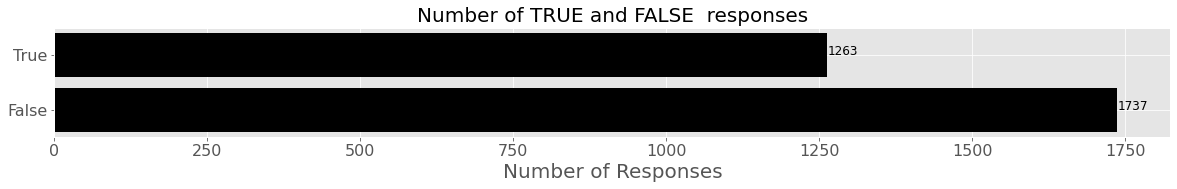

In [2484]:
responses = df_tabular["satisfied"].value_counts()

plt.figure(figsize = (20,2)) 
plt.barh(responses.index, responses.values, color='black') # plotting x-axis against y-axis with graph color black
plt.xlabel('Number of Responses', fontsize=20) # setting the x-axis label with bigger font size
plt.title('Number of TRUE and FALSE  responses', fontsize=20) # setting the title of the graph

bar_positions = range(len(responses.index))
plt.xticks(fontsize=16); # increasing the x-axis values size
plt.yticks(bar_positions, responses.index,fontsize=16); # increasing the y-axis values size

for i, v in enumerate(responses.values): # writing values counts on the bars
    plt.text(v + 1, i, str(v), fontsize=12)

The above graph shows that generally the customers are more unsatisfied with the bank rather than being satisfied.

Now we will analyze the satisfaction of the bank customers with respect to their location, age, gender and type.

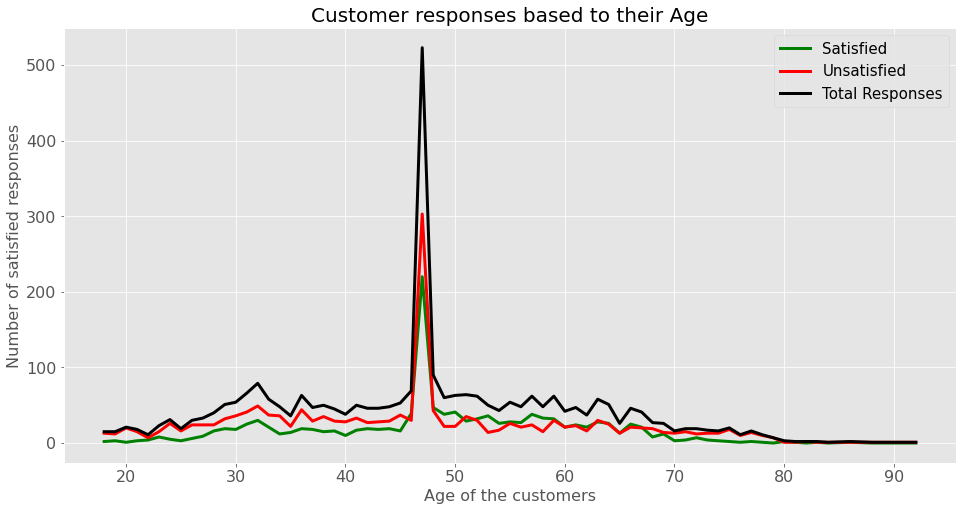

In [2485]:
# analysation of the customer response based on their age

# declaring empty lists
x_value = []
y_value_True = []
y_value_False = []
total_responses = []

age_vs_class = pd.crosstab(df_tabular["customer_age"], df_tabular["satisfied"]) # to compare the value of one feature with responses

x_value = age_vs_class.index # getting x-axis value as the values in the feature
for i in range(len(age_vs_class.index)):
    y_value_True.append(age_vs_class.values[i][1]) # getting the true satisfied responses
    y_value_False.append(age_vs_class.values[i][0]) # getting the false satisfied responses
 
# finding the totaal number of responses for each value
for t in range(len(age_vs_class.values)):
    total_responses.append(sum(age_vs_class.values[t]))

# plottin the responses
plt.figure(figsize=(16,8))
plt.plot(x_value,y_value_True, label='Satisfied', color='green',linewidth=3.0)
plt.plot(x_value,y_value_False, label='Unsatisfied', color='red',linewidth=3.0)
plt.plot(x_value,total_responses, label='Total Responses', color='black',linewidth=3.0)
plt.xlabel('Age of the customers',fontsize=16.0);
plt.ylabel('Number of satisfied responses',fontsize=16.0);
plt.title('Customer responses based to their Age',fontsize=20.0)
plt.legend(fontsize=15.0)
plt.xticks(fontsize=16); # increasing the x-axis values size
plt.yticks(fontsize=16); # increasing the y-axis values size


From the above figure we can analyze that the customers below the age of 50 have more unsatisfied responses as compared to the satisfied responses while the customers above 50 years of age have slightly high ratio of satisfied responses as compared to the unsatisfied responses. The big spike at x=47 (age) is because the unknown values were substituted with the average value of the age which is 47 years. A better visualization can be done by analyzing the ratio between satisfied and unsatisfied responses.

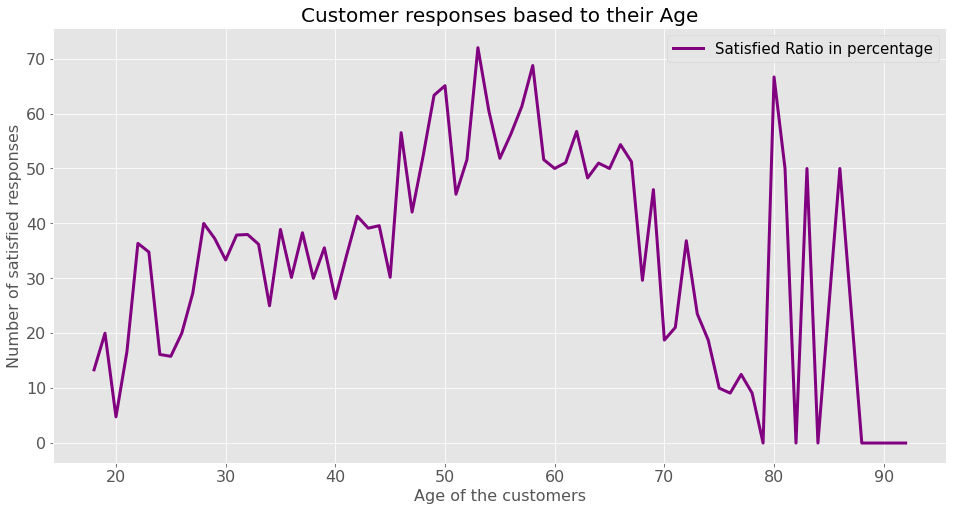

In [2486]:
response_ratio_True = []
for i in range(len(y_value_True)):
    response_ratio_True.append((y_value_True[i]/(y_value_True[i]+y_value_False[i]))*100)
    
plt.figure(figsize=(16,8))
plt.plot(x_value,response_ratio_True, label='Satisfied Ratio in percentage', color='purple',linewidth=3.0)
plt.xlabel('Age of the customers',fontsize=16.0);
plt.ylabel('Number of satisfied responses',fontsize=16.0);
plt.title('Customer responses based to their Age',fontsize=20.0)
plt.legend(fontsize=15.0)
plt.xticks(fontsize=16); # increasing the x-axis values size
plt.yticks(fontsize=16); # increasing the y-axis values size

The graph above shows that above 50% of the customer aging 45 to 65 are satisfied with the bank.

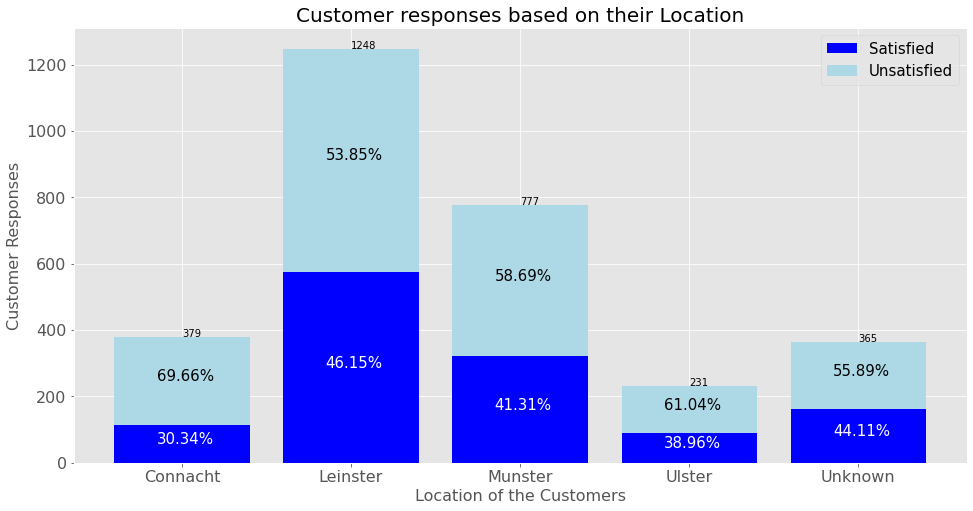

In [2487]:
# analysation of the customer response based on their location

x_value = []
y_value_True = []
y_value_False = []
total_responses = []

location_vs_class = pd.crosstab(df_tabular["customer_location"], df_tabular["satisfied"])

x_value = location_vs_class.index
for j in range(len(location_vs_class.index)):
    y_value_True.append(location_vs_class.values[j][1])
    y_value_False.append(location_vs_class.values[j][0])
 

# finding the totaal number of responses for each value
for t in range(len(location_vs_class.values)):
    total_responses.append(sum(location_vs_class.values[t]))

# Define the positions of the bars
bar_positions = range(len(x_value))

# Create the stacked bar graph
plt.style.use('ggplot')
plt.figure(figsize=(16, 8))
plt.bar(bar_positions, y_value_True, label='Satisfied', color='blue')
plt.bar(bar_positions, y_value_False, bottom=y_value_True, label='Unsatisfied', color='lightblue')
for i, v in enumerate(total_responses): # putting the total number of values on the top of the bar
    plt.text(i, v, str(v))

# Add value labels to the bars
for i, (v1, v2) in enumerate(zip(y_value_True, y_value_False)):
    plt.text(i-0.15, v1/2, str(round(((v1/(v1+v2))*100),2))+'%', color='white', fontsize=15)
    plt.text(i-0.15, v1+v2/2, str(round(((v2/(v1+v2))*100),2))+'%', color='black', fontsize=15)

# Add legend, axis labels, and title
plt.xticks(bar_positions, x_value)
plt.xlabel('Location of the Customers', fontsize=16)
plt.ylabel('Customer Responses', fontsize=16)
plt.title('Customer responses based on their Location',fontsize=20.0)
plt.legend(fontsize=15)
plt.xticks(fontsize=16); # increasing the x-axis values size
plt.yticks(fontsize=16); # increasing the y-axis values size


plt.show()

From the above figure we can analyze that the customers in all parts of Ireland have higher ratio of the unsatisfied reponses as compared to the satisfied responses. The highest ratio of unsatisfied response is obtained from Connacht. Leinster among all other cities have relatively higher number of satisfied customers.

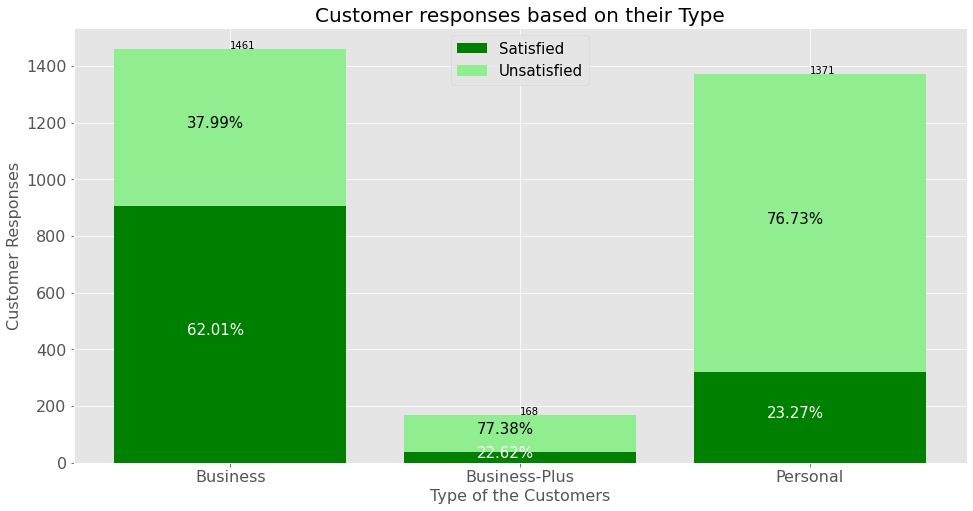

In [2488]:
# analysation of the customer response based on their type

x_value = []
y_value_True = []
y_value_False = []
total_responses = []

type_vs_class = pd.crosstab(df_tabular["customer_type"], df_tabular["satisfied"])

x_value = type_vs_class.index
for j in range(len(type_vs_class.index)):
    y_value_True.append(type_vs_class.values[j][1])
    y_value_False.append(type_vs_class.values[j][0])
    
    
# finding the totaal number of responses for each value
for t in range(len(type_vs_class.values)):
    total_responses.append(sum(type_vs_class.values[t]))

# Define the positions of the bars
bar_positions = range(len(x_value))

# Create the stacked bar graph
plt.style.use('ggplot')
plt.figure(figsize=(16, 8))
plt.bar(bar_positions, y_value_True, label='Satisfied', color='green')
plt.bar(bar_positions, y_value_False, bottom=y_value_True, label='Unsatisfied', color='lightgreen')
for i, v in enumerate(total_responses):
    plt.text(i, v, str(v))

# Add value labels to the bars
for i, (v1, v2) in enumerate(zip(y_value_True, y_value_False)):
    plt.text(i-0.15, v1/2, str(round(((v1/(v1+v2))*100),2))+'%', color='white', fontsize=15)
    plt.text(i-0.15, v1+v2/2, str(round(((v2/(v1+v2))*100),2))+'%', color='black', fontsize=15)

# Add legend, axis labels, and title
plt.xticks(bar_positions, x_value)
plt.xlabel('Type of the Customers', fontsize=16)
plt.ylabel('Customer Responses', fontsize=16)
plt.title('Customer responses based on their Type',fontsize=20.0)
plt.legend(fontsize=15)
plt.xticks(fontsize=16); # increasing the x-axis values size
plt.yticks(fontsize=16); # increasing the y-axis values size


plt.show()

According to the customer types 62% of the Business customers are satisfied. But the Personal and business-plus customers are highly unsatisfied with the bank as shown in the graph.

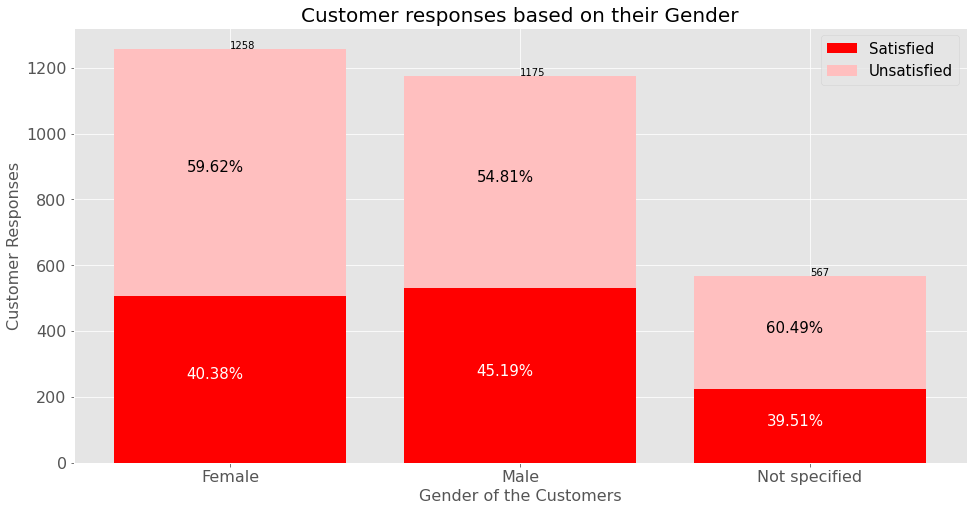

In [2489]:
# analysation of the customer response based on their gender

x_value = []
y_value_True = []
y_value_False = []
total_responses = []


gender_vs_class = pd.crosstab(df_tabular["customer_gender"], df_tabular["satisfied"])

x_value = gender_vs_class.index
for j in range(len(gender_vs_class.index)):
    y_value_True.append(gender_vs_class.values[j][1])
    y_value_False.append(gender_vs_class.values[j][0])
 
# finding the totaal number of responses for each value
for t in range(len(gender_vs_class.values)):
    total_responses.append(sum(gender_vs_class.values[t]))


# Define the positions of the bars
bar_positions = range(len(x_value))

# Create the stacked bar graph
plt.style.use('ggplot')
plt.figure(figsize=(16, 8))
plt.bar(bar_positions, y_value_True, label='Satisfied', color='red')
plt.bar(bar_positions, y_value_False, bottom=y_value_True, label='Unsatisfied', color=(1,0.75,0.75))
for i, v in enumerate(total_responses):
    plt.text(i, v, str(v))

# Add value labels to the bars
for i, (v1, v2) in enumerate(zip(y_value_True, y_value_False)):
    plt.text(i-0.15, v1/2, str(round(((v1/(v1+v2))*100),2))+'%', color='white', fontsize=15)
    plt.text(i-0.15, v1+v2/2, str(round(((v2/(v1+v2))*100),2))+'%', color='black', fontsize=15)

# Add legend, axis labels, and title
plt.xticks(bar_positions, x_value)
plt.xlabel('Gender of the Customers', fontsize=16)
plt.ylabel('Customer Responses', fontsize=16)
plt.title('Customer responses based on their Gender',fontsize=20.0)
plt.legend(fontsize=15)
plt.xticks(fontsize=16); # increasing the x-axis values size
plt.yticks(fontsize=16); # increasing the y-axis values size


plt.show()

According to the gender of the customers we can analyze that both male and female customers have higher ratio of unsatisfied responses as compared to the satisfied responses.

Now we will analyze the responses of the customers who have mortgaga and credit card.

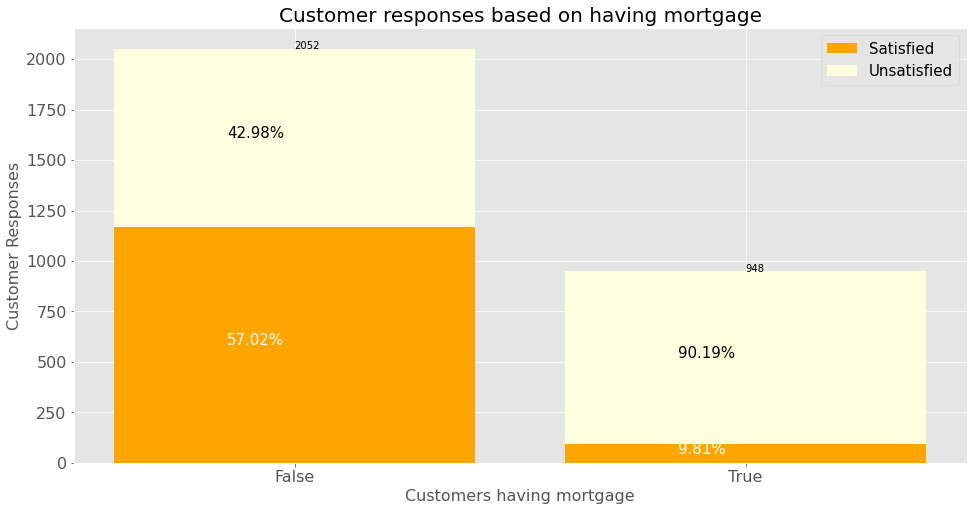

In [2490]:
# analysation of the customer response based on having mortgage

x_value = []
y_value_True = []
y_value_False = []
total_responses = []


mortgage_vs_class = pd.crosstab(df_tabular["has_mortgage"], df_tabular["satisfied"])

x_value = mortgage_vs_class.index
for j in range(len(mortgage_vs_class.index)):
    y_value_True.append(mortgage_vs_class.values[j][1])
    y_value_False.append(mortgage_vs_class.values[j][0])
 
# finding the totaal number of responses for each value
for t in range(len(mortgage_vs_class.values)):
    total_responses.append(sum(mortgage_vs_class.values[t]))


# Define the positions of the bars
bar_positions = range(len(x_value))

# Create the stacked bar graph
plt.style.use('ggplot')
plt.figure(figsize=(16, 8))
plt.bar(bar_positions, y_value_True, label='Satisfied', color='orange')
plt.bar(bar_positions, y_value_False, bottom=y_value_True, label='Unsatisfied', color='lightyellow')
for i, v in enumerate(total_responses):
    plt.text(i, v, str(v))

# Add value labels to the bars
for i, (v1, v2) in enumerate(zip(y_value_True, y_value_False)):
    plt.text(i-0.15, v1/2, str(round(((v1/(v1+v2))*100),2))+'%', color='white', fontsize=15)
    plt.text(i-0.15, v1+v2/2, str(round(((v2/(v1+v2))*100),2))+'%', color='black', fontsize=15)

# Add legend, axis labels, and title
plt.xticks(bar_positions, x_value)
plt.xlabel('Customers having mortgage', fontsize=16)
plt.ylabel('Customer Responses', fontsize=16)
plt.title('Customer responses based on having mortgage',fontsize=20.0)
plt.legend(fontsize=15)
plt.xticks(fontsize=16); # increasing the x-axis values size
plt.yticks(fontsize=16); # increasing the y-axis values size


plt.show()

The above results shows that the customers having mortgage are very unsatisfied with the bank and 57% of the customers who don't have mortgage are satisfied.

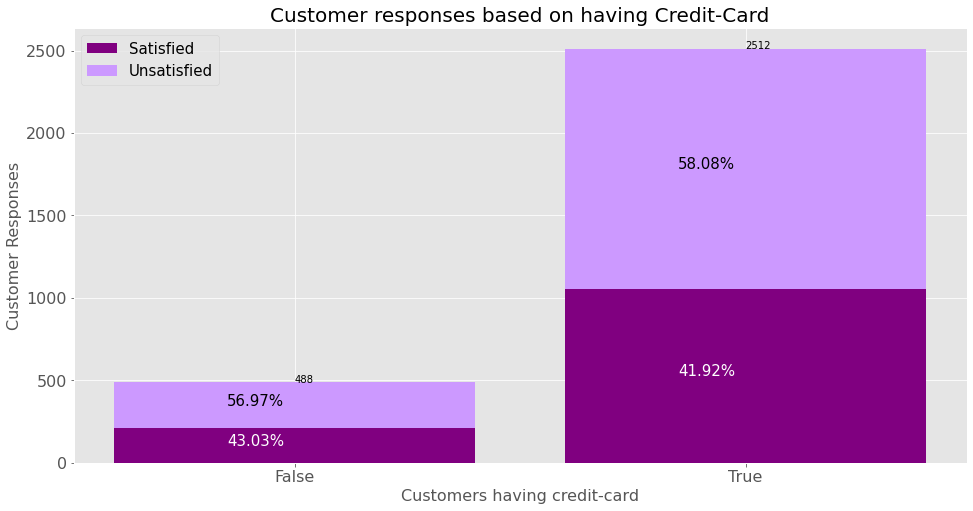

In [2491]:
# analysation of the customer response based on having credit card

x_value = []
y_value_True = []
y_value_False = []
total_responses = []


creditcard_vs_class = pd.crosstab(df_tabular["has_cc"], df_tabular["satisfied"])

x_value = creditcard_vs_class.index
for j in range(len(creditcard_vs_class.index)):
    y_value_True.append(creditcard_vs_class.values[j][1])
    y_value_False.append(creditcard_vs_class.values[j][0])
 
# finding the totaal number of responses for each value
for t in range(len(creditcard_vs_class.values)):
    total_responses.append(sum(creditcard_vs_class.values[t]))


# Define the positions of the bars
bar_positions = range(len(x_value))

# Create the stacked bar graph
plt.style.use('ggplot')
plt.figure(figsize=(16, 8))
plt.bar(bar_positions, y_value_True, label='Satisfied', color='purple')
plt.bar(bar_positions, y_value_False, bottom=y_value_True, label='Unsatisfied', color=(0.8, 0.6, 1.0))
for i, v in enumerate(total_responses):
    plt.text(i, v, str(v))

# Add value labels to the bars
for i, (v1, v2) in enumerate(zip(y_value_True, y_value_False)):
    plt.text(i-0.15, v1/2, str(round(((v1/(v1+v2))*100),2))+'%', color='white', fontsize=15)
    plt.text(i-0.15, v1+v2/2, str(round(((v2/(v1+v2))*100),2))+'%', color='black', fontsize=15)

# Add legend, axis labels, and title
plt.xticks(bar_positions, x_value)
plt.xlabel('Customers having credit-card', fontsize=16)
plt.ylabel('Customer Responses', fontsize=16)
plt.title('Customer responses based on having Credit-Card',fontsize=20.0)
plt.legend(fontsize=15)
plt.xticks(fontsize=16); # increasing the x-axis values size
plt.yticks(fontsize=16); # increasing the y-axis values size


plt.show()

The above results shows that there are very few customer who don't posses credit card and 58% of the customers possessing credit card are unsatisfied with the bank.

Now to explore the temporal aspects of the data we need to sort the data according to the date.

In [2492]:
df_tabular_SortedByDate = df_tabular.sort_values(by='date')

<AxesSubplot:xlabel='date', ylabel='count'>

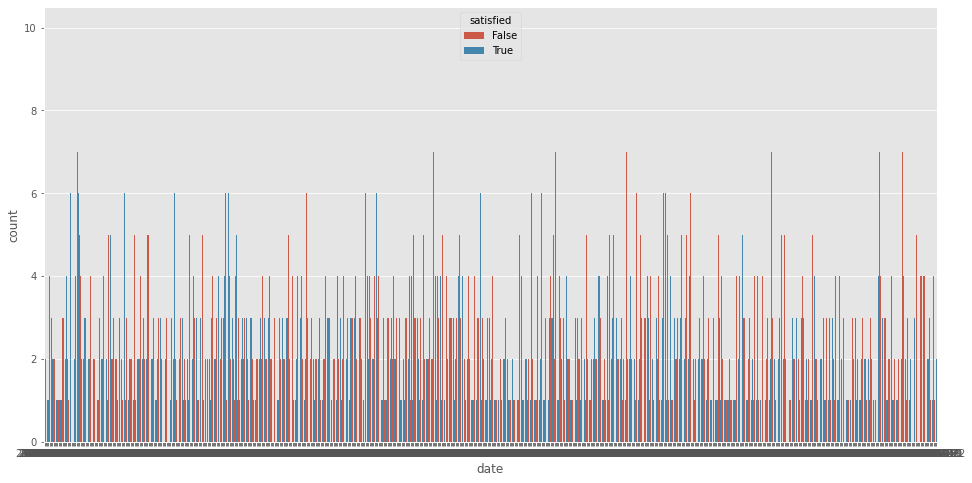

In [2493]:
# plt.plot(df_tabular_SortedByDate['date'].index,df_tabular_SortedByDate['satisfied'].values)

import seaborn as sns

plt.figure(figsize=(16,8))
sns.countplot(x='date',hue='satisfied',data=df_tabular_SortedByDate)

From above graph we can see that the data is difficult to analyze in this way so we can divide the dataset into smaller datasets and then can do analyis on the average value of those smaller datasets that. Since the data is now sorted with the date the first sub-data set will represent the oldest time in the dataset and the last sub-data set will represent the newest or latest time of the response. The data is from january 2021 to december 2022.

In [2494]:
# breaking the data set of length=3000 in to 12 smaller blocks of length=250

df_tabular_SortedByDate1 = df_tabular_SortedByDate[0:250]
df_tabular_SortedByDate2 = df_tabular_SortedByDate[250:500]
df_tabular_SortedByDate3 = df_tabular_SortedByDate[500:750]
df_tabular_SortedByDate4 = df_tabular_SortedByDate[750:1000]
df_tabular_SortedByDate5 = df_tabular_SortedByDate[1000:1250]
df_tabular_SortedByDate6 = df_tabular_SortedByDate[1250:1500]
df_tabular_SortedByDate7 = df_tabular_SortedByDate[1500:1750]
df_tabular_SortedByDate8 = df_tabular_SortedByDate[1750:2000]
df_tabular_SortedByDate9 = df_tabular_SortedByDate[2000:2250]
df_tabular_SortedByDate10 = df_tabular_SortedByDate[2250:2500]
df_tabular_SortedByDate11 = df_tabular_SortedByDate[2500:2750]
df_tabular_SortedByDate12 = df_tabular_SortedByDate[2750:3000]


# getting the customer responses for sub data frames
sorted_response1 = df_tabular_SortedByDate1['satisfied'].value_counts()
sorted_response2 = df_tabular_SortedByDate2['satisfied'].value_counts()
sorted_response3 = df_tabular_SortedByDate3['satisfied'].value_counts()
sorted_response4 = df_tabular_SortedByDate4['satisfied'].value_counts()
sorted_response5 = df_tabular_SortedByDate5['satisfied'].value_counts()
sorted_response6 = df_tabular_SortedByDate6['satisfied'].value_counts()
sorted_response7 = df_tabular_SortedByDate7['satisfied'].value_counts()
sorted_response8 = df_tabular_SortedByDate8['satisfied'].value_counts()
sorted_response9 = df_tabular_SortedByDate9['satisfied'].value_counts()
sorted_response10 = df_tabular_SortedByDate10['satisfied'].value_counts()
sorted_response11 = df_tabular_SortedByDate11['satisfied'].value_counts()
sorted_response12 = df_tabular_SortedByDate12['satisfied'].value_counts()

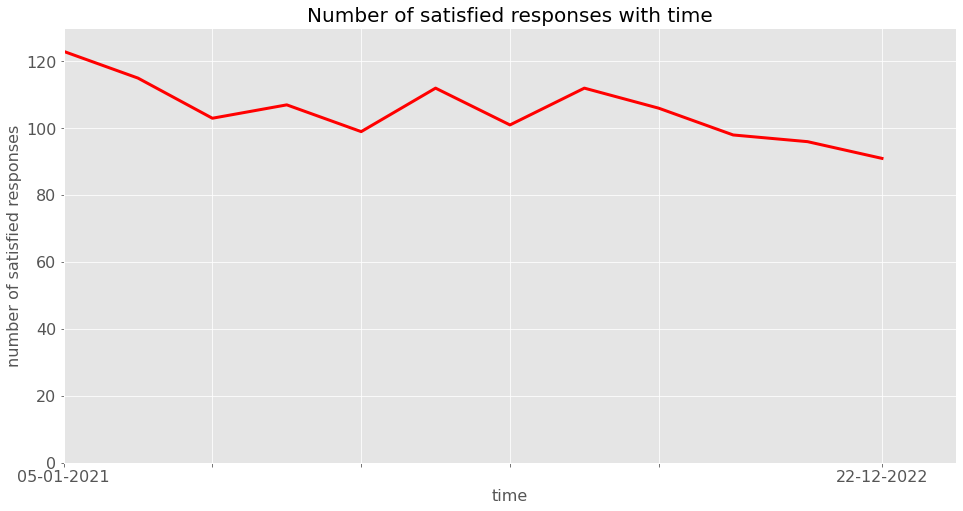

In [2495]:
# making lists for axis data

x_val = list(range(12))
y_val_satisfied = []
y_val_satisfied.append(sorted_response1.values[1])
y_val_satisfied.append(sorted_response2.values[1])
y_val_satisfied.append(sorted_response3.values[1])
y_val_satisfied.append(sorted_response4.values[1])
y_val_satisfied.append(sorted_response5.values[1])
y_val_satisfied.append(sorted_response6.values[1])
y_val_satisfied.append(sorted_response7.values[1])
y_val_satisfied.append(sorted_response8.values[1])
y_val_satisfied.append(sorted_response9.values[1])
y_val_satisfied.append(sorted_response10.values[1])
y_val_satisfied.append(sorted_response11.values[1])
y_val_satisfied.append(sorted_response12.values[1])



fig, ax = plt.subplots(figsize=(16,8))
ax.plot(x_val,y_val_satisfied, color='red', linewidth=3.0)
plt.xlabel('time', fontsize=16)
plt.ylabel('number of satisfied responses', fontsize=16)
plt.title('Number of satisfied responses with time', fontsize=20)

plt.xticks(fontsize=16); # increasing the x-axis values size
plt.yticks(fontsize=16); # increasing the y-axis values size
ax.set_ylim([0, 130]);
ax.set_xlim([0, 12]);
ax.set_xticks([0,2,4,6,8,11]);
ax.set_xticklabels(['05-01-2021','','','','','22-12-2022']);

From the above figure we can analyze that as the number of satisfied customer decrease with time from 2021 to 2022.

Now we can analyze the change in the customer rating for all different columns like convenience, customer service, online banking etc with time from january 2021 to december 2022 which is done below:

In [2496]:
#Getting the convenience rating with time.

y_val_conv = []

y_val_conv.append(df_tabular_SortedByDate1['convenience'].mean())
y_val_conv.append(df_tabular_SortedByDate2['convenience'].mean())
y_val_conv.append(df_tabular_SortedByDate3['convenience'].mean())
y_val_conv.append(df_tabular_SortedByDate4['convenience'].mean())
y_val_conv.append(df_tabular_SortedByDate5['convenience'].mean())
y_val_conv.append(df_tabular_SortedByDate6['convenience'].mean())
y_val_conv.append(df_tabular_SortedByDate7['convenience'].mean())
y_val_conv.append(df_tabular_SortedByDate8['convenience'].mean())
y_val_conv.append(df_tabular_SortedByDate9['convenience'].mean())
y_val_conv.append(df_tabular_SortedByDate10['convenience'].mean())
y_val_conv.append(df_tabular_SortedByDate11['convenience'].mean())
y_val_conv.append(df_tabular_SortedByDate12['convenience'].mean())

In [2497]:
#Getting the convenience rating with time.

y_val_customer_service = []

y_val_customer_service.append(df_tabular_SortedByDate1['customer_service'].mean())
y_val_customer_service.append(df_tabular_SortedByDate2['customer_service'].mean())
y_val_customer_service.append(df_tabular_SortedByDate3['customer_service'].mean())
y_val_customer_service.append(df_tabular_SortedByDate4['customer_service'].mean())
y_val_customer_service.append(df_tabular_SortedByDate5['customer_service'].mean())
y_val_customer_service.append(df_tabular_SortedByDate6['customer_service'].mean())
y_val_customer_service.append(df_tabular_SortedByDate7['customer_service'].mean())
y_val_customer_service.append(df_tabular_SortedByDate8['customer_service'].mean())
y_val_customer_service.append(df_tabular_SortedByDate9['customer_service'].mean())
y_val_customer_service.append(df_tabular_SortedByDate10['customer_service'].mean())
y_val_customer_service.append(df_tabular_SortedByDate11['customer_service'].mean())
y_val_customer_service.append(df_tabular_SortedByDate12['customer_service'].mean())

In [2498]:
#Getting the online_banking rating with time.

y_val_online_banking = []

y_val_online_banking.append(df_tabular_SortedByDate1['online_banking'].mean())
y_val_online_banking.append(df_tabular_SortedByDate2['online_banking'].mean())
y_val_online_banking.append(df_tabular_SortedByDate3['online_banking'].mean())
y_val_online_banking.append(df_tabular_SortedByDate4['online_banking'].mean())
y_val_online_banking.append(df_tabular_SortedByDate5['online_banking'].mean())
y_val_online_banking.append(df_tabular_SortedByDate6['online_banking'].mean())
y_val_online_banking.append(df_tabular_SortedByDate7['online_banking'].mean())
y_val_online_banking.append(df_tabular_SortedByDate8['online_banking'].mean())
y_val_online_banking.append(df_tabular_SortedByDate9['online_banking'].mean())
y_val_online_banking.append(df_tabular_SortedByDate10['online_banking'].mean())
y_val_online_banking.append(df_tabular_SortedByDate11['online_banking'].mean())
y_val_online_banking.append(df_tabular_SortedByDate12['online_banking'].mean())

In [2499]:
#Getting the interest_rates rating with time.

y_val_interest_rates = []

y_val_interest_rates.append(df_tabular_SortedByDate1['interest_rates'].mean())
y_val_interest_rates.append(df_tabular_SortedByDate2['interest_rates'].mean())
y_val_interest_rates.append(df_tabular_SortedByDate3['interest_rates'].mean())
y_val_interest_rates.append(df_tabular_SortedByDate4['interest_rates'].mean())
y_val_interest_rates.append(df_tabular_SortedByDate5['interest_rates'].mean())
y_val_interest_rates.append(df_tabular_SortedByDate6['interest_rates'].mean())
y_val_interest_rates.append(df_tabular_SortedByDate7['interest_rates'].mean())
y_val_interest_rates.append(df_tabular_SortedByDate8['interest_rates'].mean())
y_val_interest_rates.append(df_tabular_SortedByDate9['interest_rates'].mean())
y_val_interest_rates.append(df_tabular_SortedByDate10['interest_rates'].mean())
y_val_interest_rates.append(df_tabular_SortedByDate11['interest_rates'].mean())
y_val_interest_rates.append(df_tabular_SortedByDate12['interest_rates'].mean())

In [2500]:
#Getting the fees_charges rating with time.

y_val_fees_charges = []

y_val_fees_charges.append(df_tabular_SortedByDate1['fees_charges'].mean())
y_val_fees_charges.append(df_tabular_SortedByDate2['fees_charges'].mean())
y_val_fees_charges.append(df_tabular_SortedByDate3['fees_charges'].mean())
y_val_fees_charges.append(df_tabular_SortedByDate4['fees_charges'].mean())
y_val_fees_charges.append(df_tabular_SortedByDate5['fees_charges'].mean())
y_val_fees_charges.append(df_tabular_SortedByDate6['fees_charges'].mean())
y_val_fees_charges.append(df_tabular_SortedByDate7['fees_charges'].mean())
y_val_fees_charges.append(df_tabular_SortedByDate8['fees_charges'].mean())
y_val_fees_charges.append(df_tabular_SortedByDate9['fees_charges'].mean())
y_val_fees_charges.append(df_tabular_SortedByDate10['fees_charges'].mean())
y_val_fees_charges.append(df_tabular_SortedByDate11['fees_charges'].mean())
y_val_fees_charges.append(df_tabular_SortedByDate12['fees_charges'].mean())

In [2501]:
#Getting the community_involvement rating with time.

y_val_community_involvement = []

y_val_community_involvement.append(df_tabular_SortedByDate1['community_involvement'].mean())
y_val_community_involvement.append(df_tabular_SortedByDate2['community_involvement'].mean())
y_val_community_involvement.append(df_tabular_SortedByDate3['community_involvement'].mean())
y_val_community_involvement.append(df_tabular_SortedByDate4['community_involvement'].mean())
y_val_community_involvement.append(df_tabular_SortedByDate5['community_involvement'].mean())
y_val_community_involvement.append(df_tabular_SortedByDate6['community_involvement'].mean())
y_val_community_involvement.append(df_tabular_SortedByDate7['community_involvement'].mean())
y_val_community_involvement.append(df_tabular_SortedByDate8['community_involvement'].mean())
y_val_community_involvement.append(df_tabular_SortedByDate9['community_involvement'].mean())
y_val_community_involvement.append(df_tabular_SortedByDate10['community_involvement'].mean())
y_val_community_involvement.append(df_tabular_SortedByDate11['community_involvement'].mean())
y_val_community_involvement.append(df_tabular_SortedByDate12['community_involvement'].mean())

In [2502]:
#Getting the products_services rating with time.

y_val_products_services = []

y_val_products_services.append(df_tabular_SortedByDate1['products_services'].mean())
y_val_products_services.append(df_tabular_SortedByDate2['products_services'].mean())
y_val_products_services.append(df_tabular_SortedByDate3['products_services'].mean())
y_val_products_services.append(df_tabular_SortedByDate4['products_services'].mean())
y_val_products_services.append(df_tabular_SortedByDate5['products_services'].mean())
y_val_products_services.append(df_tabular_SortedByDate6['products_services'].mean())
y_val_products_services.append(df_tabular_SortedByDate7['products_services'].mean())
y_val_products_services.append(df_tabular_SortedByDate8['products_services'].mean())
y_val_products_services.append(df_tabular_SortedByDate9['products_services'].mean())
y_val_products_services.append(df_tabular_SortedByDate10['products_services'].mean())
y_val_products_services.append(df_tabular_SortedByDate11['products_services'].mean())
y_val_products_services.append(df_tabular_SortedByDate12['products_services'].mean())

In [2503]:
#Getting the privacy_security rating with time.

y_val_privacy_security = []

y_val_privacy_security.append(df_tabular_SortedByDate1['privacy_security'].mean())
y_val_privacy_security.append(df_tabular_SortedByDate2['privacy_security'].mean())
y_val_privacy_security.append(df_tabular_SortedByDate3['privacy_security'].mean())
y_val_privacy_security.append(df_tabular_SortedByDate4['privacy_security'].mean())
y_val_privacy_security.append(df_tabular_SortedByDate5['privacy_security'].mean())
y_val_privacy_security.append(df_tabular_SortedByDate6['privacy_security'].mean())
y_val_privacy_security.append(df_tabular_SortedByDate7['privacy_security'].mean())
y_val_privacy_security.append(df_tabular_SortedByDate8['privacy_security'].mean())
y_val_privacy_security.append(df_tabular_SortedByDate9['privacy_security'].mean())
y_val_privacy_security.append(df_tabular_SortedByDate10['privacy_security'].mean())
y_val_privacy_security.append(df_tabular_SortedByDate11['privacy_security'].mean())
y_val_privacy_security.append(df_tabular_SortedByDate12['privacy_security'].mean())

In [2504]:
#Getting the reputation rating with time.

y_val_reputation = []

y_val_reputation.append(df_tabular_SortedByDate1['reputation'].mean())
y_val_reputation.append(df_tabular_SortedByDate2['reputation'].mean())
y_val_reputation.append(df_tabular_SortedByDate3['reputation'].mean())
y_val_reputation.append(df_tabular_SortedByDate4['reputation'].mean())
y_val_reputation.append(df_tabular_SortedByDate5['reputation'].mean())
y_val_reputation.append(df_tabular_SortedByDate6['reputation'].mean())
y_val_reputation.append(df_tabular_SortedByDate7['reputation'].mean())
y_val_reputation.append(df_tabular_SortedByDate8['reputation'].mean())
y_val_reputation.append(df_tabular_SortedByDate9['reputation'].mean())
y_val_reputation.append(df_tabular_SortedByDate10['reputation'].mean())
y_val_reputation.append(df_tabular_SortedByDate11['reputation'].mean())
y_val_reputation.append(df_tabular_SortedByDate12['reputation'].mean())

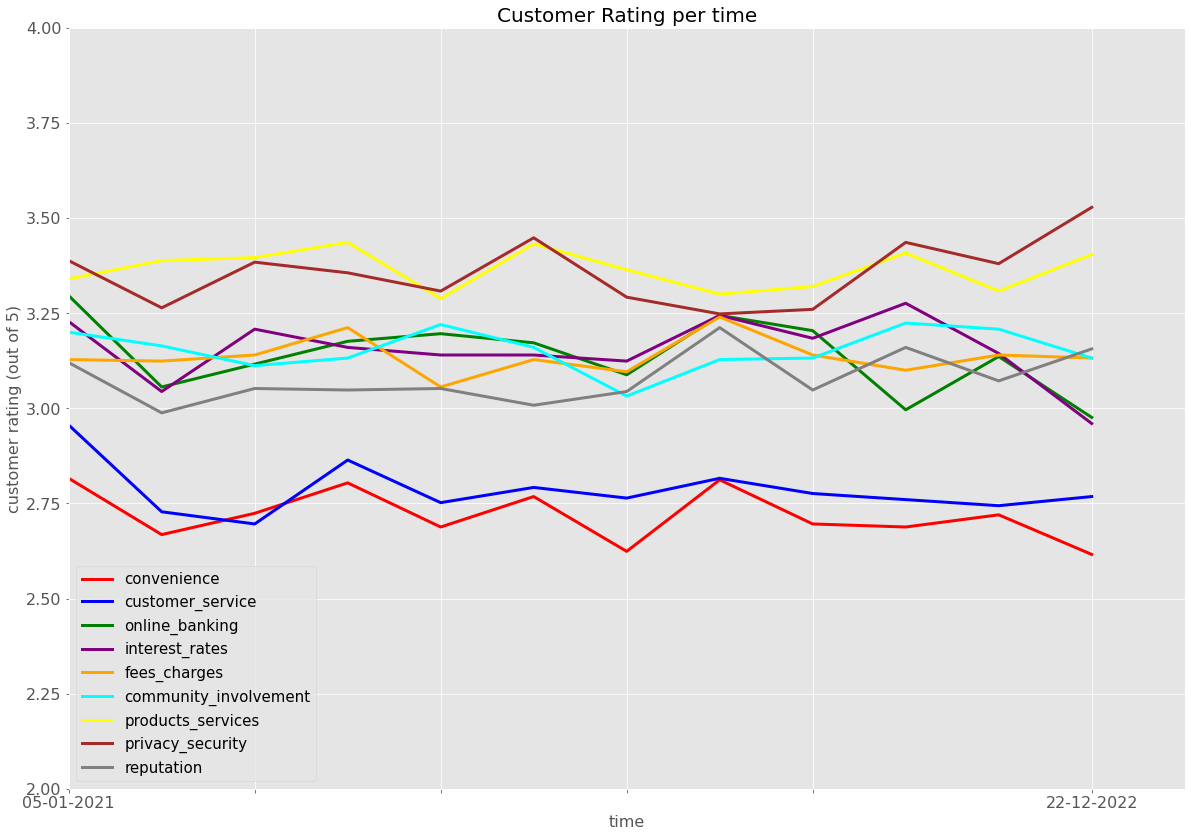

In [2505]:
# plotting all the rating data on a single graph

fig, ax = plt.subplots(figsize=(20,14))

ax.plot(x_val,y_val_conv, label='convenience', color='red', linewidth=3.0)
ax.plot(x_val,y_val_customer_service, label='customer_service', color='blue', linewidth=3.0)
ax.plot(x_val,y_val_online_banking, label='online_banking', color='green', linewidth=3.0)
ax.plot(x_val,y_val_interest_rates, label='interest_rates', color='purple', linewidth=3.0)
ax.plot(x_val,y_val_fees_charges, label='fees_charges', color='orange', linewidth=3.0)
ax.plot(x_val,y_val_community_involvement, label='community_involvement', color='cyan', linewidth=3.0)
ax.plot(x_val,y_val_products_services, label='products_services', color='yellow', linewidth=3.0)
ax.plot(x_val,y_val_privacy_security, label='privacy_security', color='brown', linewidth=3.0)
ax.plot(x_val,y_val_reputation, label='reputation', color='grey', linewidth=3.0)


plt.xlabel('time', fontsize=16)
plt.ylabel('customer rating (out of 5)', fontsize=16)
plt.title('Customer Rating per time', fontsize=20)

plt.xticks(fontsize=16); # increasing the x-axis values size
plt.yticks(fontsize=16); # increasing the y-axis values size
ax.set_ylim([2, 4]);
ax.set_xlim([0, 12]);
ax.set_xticks([0,2,4,6,8,11]);
ax.set_xticklabels(['05-01-2021','','','','','22-12-2022']);
ax.legend(fontsize=15.0)

From the above diagram we can analyze that the customer rating average for all the features from the start of January 2021 to the end December 2022 were in the range of 2.5 and 4. Some ratings increased with time while some decreased at the end of 2022. The analysation can also be done by plotting the ratings of the features seperately along with their mean value to see whether the ratings were below or above their mean value at the end of 2022.

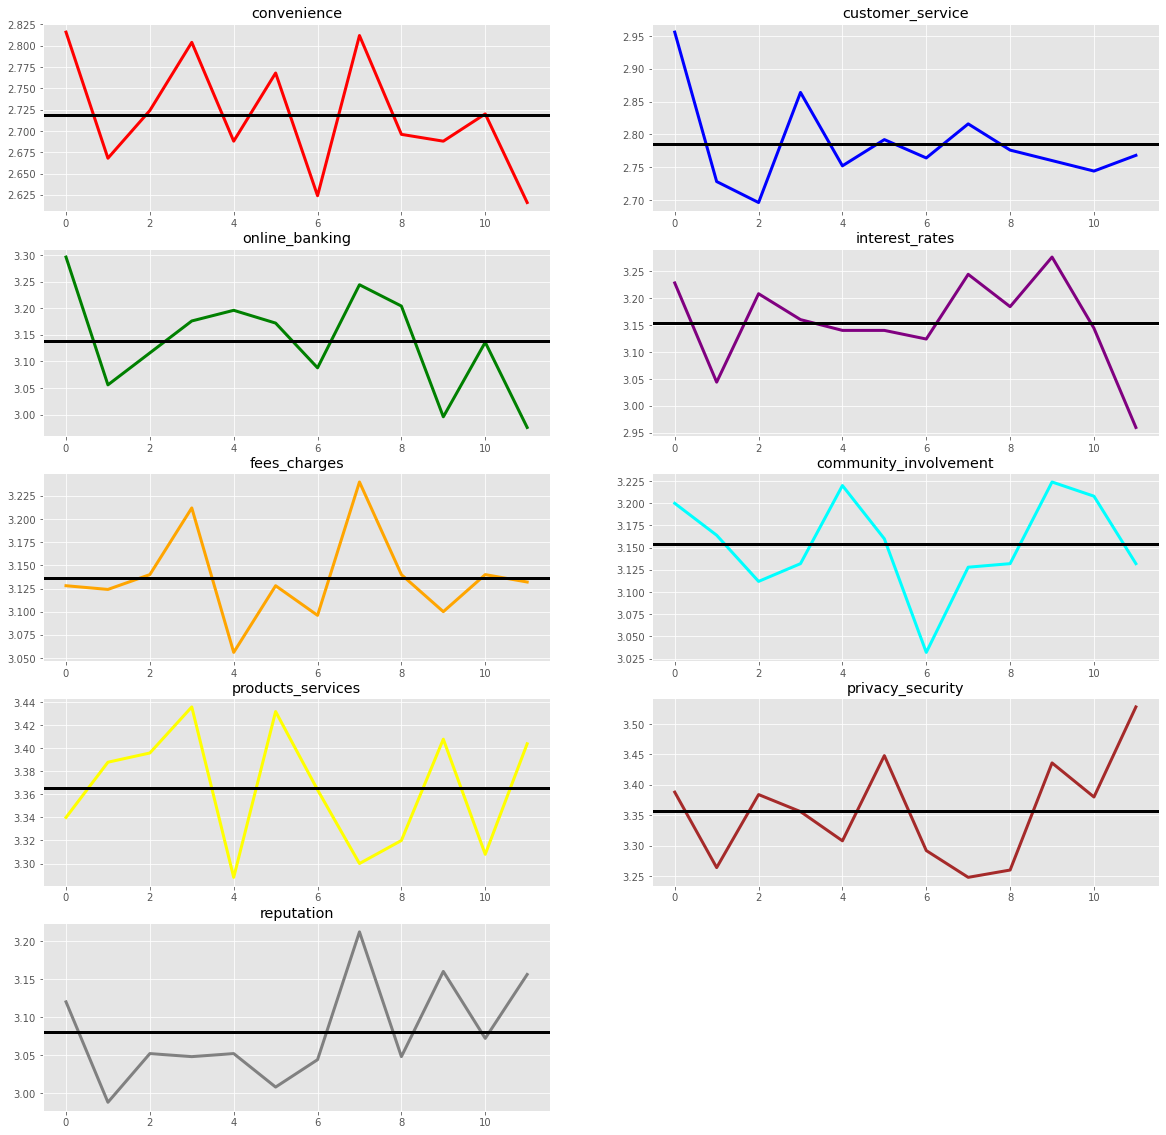

In [2506]:
plt.figure(figsize=(20,20))

plt.subplot(521)
plt.plot(x_val,y_val_conv, color='red', linewidth=3.0)
plt.axhline(df_tabular["convenience"].mean(), color='black', linewidth=3.0)
plt.title("convenience")

plt.subplot(522)
plt.plot(x_val,y_val_customer_service, color='blue', linewidth=3.0)
plt.axhline(df_tabular["customer_service"].mean(), color='black', linewidth=3.0)
plt.title("customer_service")

plt.subplot(523)
plt.plot(x_val,y_val_online_banking, color='green', linewidth=3.0)
plt.axhline(df_tabular["online_banking"].mean(), color='black', linewidth=3.0)
plt.title("online_banking")

plt.subplot(524)
plt.plot(x_val,y_val_interest_rates, color='purple', linewidth=3.0)
plt.axhline(df_tabular["interest_rates"].mean(), color='black', linewidth=3.0)
plt.title("interest_rates")

plt.subplot(525)
plt.plot(x_val,y_val_fees_charges, color='orange', linewidth=3.0)
plt.axhline(df_tabular["fees_charges"].mean(), color='black', linewidth=3.0)
plt.title("fees_charges")

plt.subplot(526)
plt.plot(x_val,y_val_community_involvement, color='cyan', linewidth=3.0)
plt.axhline(df_tabular["community_involvement"].mean(), color='black', linewidth=3.0)
plt.title("community_involvement")

plt.subplot(527)
plt.plot(x_val,y_val_products_services, color='yellow', linewidth=3.0)
plt.axhline(df_tabular["products_services"].mean(), color='black', linewidth=3.0)
plt.title("products_services")

plt.subplot(528)
plt.plot(x_val,y_val_privacy_security, color='brown', linewidth=3.0)
plt.axhline(df_tabular["privacy_security"].mean(), color='black', linewidth=3.0)
plt.title("privacy_security")

plt.subplot(529)
plt.plot(x_val,y_val_reputation, color='grey', linewidth=3.0)
plt.axhline(df_tabular["reputation"].mean(), color='black', linewidth=3.0)
plt.title("reputation");

From the above results we can conclude that:


- The **convenience** rating started with above its average rating and after following some ups and downs ended up at below 2.6. The graph shows the decrease in rating of convenience below its average value with time.


- The **customer service** rating was realtively good in the beginning as compared to its measn value but it decreased highly in the first half of 2021. Then it again raised above its mean value and after following some ups and downs eventually ended just below its mean value.


- The **online banking** rating started started highly at 3.3 bu then decreased below its mean value in the first half of 2021 but then got better in the early 2022. Then again it decreased highly and ended up far below its mean value at the end of 2022.


- The **interest rate** rating following slight ups and down over its mean value decreased highly at the end of 2022.


- The **fee charges** rating got its hike in the middle phase of 2021 and 2022 but started and ended very near to its mean value.


- The **community involvement** rating started above at 3.2 in 2021 but got a large dip in the early 2022 but then it was increased and finally ended up just below its mean value.


- The **product service** rating wasn't stable at all. It started below its means value in 2021 but after following large ups and downs eventually ended above 3.5.


- The **privacy security** rating was below its average value at the start of 2021 but then improved highly above 3.5 at the end of 2022.


- The **reputation** rating was not good in 2021 but it increased in 2022 and finally ended up at 3.15 at the end of 2022

# _____________________________________________________________________________

## TASK 03: TABULAR DATA CLASSIFICATION

In this task the classification of the customer's response is done according to their ratings of the 9 features. For this first we have to remove the non-numeric data from the data set and seperate the target variable ('satisfied') from the features.

In [2507]:
df_tabular.head()

,date,customer_gender,customer_age,customer_location,customer_type,has_cc,has_mortgage,convenience,customer_service,online_banking,interest_rates,fees_charges,community_involvement,products_services,privacy_security,reputation,satisfied
0,2022-08-22,Male,50.0,Munster,Personal,True,False,4.0,5.0,4.0,4.0,4.0,4.0,5.0,2.0,4.0,True
1,2022-11-23,Female,61.0,Leinster,Personal,True,False,5.0,5.0,5.0,3.0,5.0,4.0,4.0,5.0,5.0,True
2,2022-01-21,Female,63.0,Munster,Business,True,False,2.0,2.0,5.0,5.0,2.0,3.0,4.0,4.0,3.0,True
3,2022-03-13,Female,47.0,Leinster,Business,True,False,3.0,4.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,True
4,2022-08-08,Female,41.0,Leinster,Personal,True,True,1.0,1.0,1.0,1.0,2.0,2.0,4.0,5.0,2.0,False


In [2508]:
# checking the number with each class label.
df_tabular["satisfied"].value_counts()

False    1737
True     1263
Name: satisfied, dtype: int64

In [2509]:
# removing the unrequired feature.
df_tabular_forClassification = df_tabular.copy()
df_tabular_forClassification.drop(["date", "customer_gender", "customer_age", "customer_location", 
                                                "customer_type", "has_cc", "has_mortgage"], axis=1, inplace=True)


In [2510]:
df_tabular_forClassification

,convenience,customer_service,online_banking,interest_rates,fees_charges,community_involvement,products_services,privacy_security,reputation,satisfied
0,4.0,5.0,4.0,4.0,4.0,4.0,5.0,2.0,4.0,True
1,5.0,5.0,5.0,3.0,5.0,4.0,4.0,5.0,5.0,True
2,2.0,2.0,5.0,5.0,2.0,3.0,4.0,4.0,3.0,True
3,3.0,4.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,True
4,1.0,1.0,1.0,1.0,2.0,2.0,4.0,5.0,2.0,False
...,...,...,...,...,...,...,...,...,...,...
2995,3.0,3.0,3.0,3.0,5.0,3.0,3.0,1.0,5.0,False
2996,3.0,2.0,5.0,1.0,2.0,2.0,2.0,2.0,3.0,True
2997,3.0,3.0,3.0,4.0,4.0,3.0,4.0,4.0,4.0,False
2998,3.0,2.0,1.0,5.0,4.0,4.0,3.0,4.0,1.0,True


In [2511]:
# the target label
target = df_tabular_forClassification["satisfied"]
# remove the target label, giving us just the numeric feratures for classification
data = df_tabular_forClassification.drop("satisfied", axis=1).copy()
data

,convenience,customer_service,online_banking,interest_rates,fees_charges,community_involvement,products_services,privacy_security,reputation
0,4.0,5.0,4.0,4.0,4.0,4.0,5.0,2.0,4.0
1,5.0,5.0,5.0,3.0,5.0,4.0,4.0,5.0,5.0
2,2.0,2.0,5.0,5.0,2.0,3.0,4.0,4.0,3.0
3,3.0,4.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0
4,1.0,1.0,1.0,1.0,2.0,2.0,4.0,5.0,2.0
...,...,...,...,...,...,...,...,...,...
2995,3.0,3.0,3.0,3.0,5.0,3.0,3.0,1.0,5.0
2996,3.0,2.0,5.0,1.0,2.0,2.0,2.0,2.0,3.0
2997,3.0,3.0,3.0,4.0,4.0,3.0,4.0,4.0,4.0
2998,3.0,2.0,1.0,5.0,4.0,4.0,3.0,4.0,1.0


The target and data is now seperated and now different supervised learning classification algorithms can be used to classify the customer responses based on the feature ratings.

There are 5 classifiers used here one by one and their accuracy, cross validation accuracy and confusion matrix are found. These 5 classifiers are:

1. KNN (K-Nearest Neighbor)
2. Decision Trees
3. Naive Bayes
4. Logistic Regression
5. Support Vector Machine (SVM)

Importing all the important libraries first.

In [2512]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

### 1. KNN (K-NEAREST NEIGHBOR)

It is a simple yet effective algorithm for supervised learning classification problems.
It works by finding the k closest training examples (neighbors) in the feature space to a given test example, and classifying the test example according to the most common class among its k nearest neighbors. The value of k is a hyperparameter that needs to be set prior to running the algorithm. One drawback of KNN is that it can be computationally expensive, particularly when dealing with large datasets or high-dimensional data.

The KNN classifier is used and accuracy of the classifier is found on k=1 first. The train test split ratio was choosen as 4:1 randomly means 80% data for training and 20% data is for testing the accuracy of the classifier.

In [2513]:
data_train, data_test, target_train, target_test = train_test_split(data, target, 
    test_size=0.2, random_state=1)
print("Training set has %d examples" % data_train.shape[0])
print("Test set has %d examples" % data_test.shape[0])

Training set has 2400 examples
Test set has 600 examples


In [2514]:
# training the classifier

knn = KNeighborsClassifier(n_neighbors=3)
m = knn.fit(data_train, target_train)
# make predictions for the test set
predicted = knn.predict(data_test)

In [2515]:
# evaluating accuracy

acc = accuracy_score(target_test, predicted)
print("Accuracy=%.3f percent" % (acc*100))

# evalauting F1 scores
from sklearn.metrics import f1_score
print("F1(dissatisfied) = %.3f" % f1_score(target_test, predicted, pos_label=False) )
print("F1(satisfied) = %.3f" % f1_score(target_test, predicted, pos_label=True) )

Acc_KNN = acc # for further analysis

Accuracy=78.667 percent
F1(dissatisfied) = 0.828
F1(satisfied) = 0.719


From the above results we can see that the accuracy of KNN without any cross validation at k=1 is 74.5%. This can be improved by cross validation and using higher number of k. 

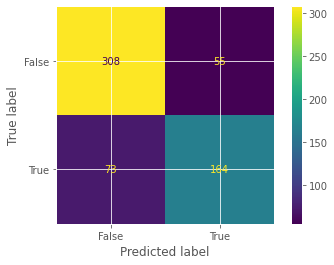

In [2516]:
# build the confusion matrix
cm = confusion_matrix(target_test, predicted)
# display it visually
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot();

cm_Knn = cm # for further analysis

From the above confusion matrix we can conclude that the KNN classifer was able to classify 81.8 % of the false values correctly and 63.3% of the true values correctly.

Now using cross validation and differnt number of k to find the accuracies and to predict what is the best number of k for our data set.


In [2517]:
knn = KNeighborsClassifier(n_neighbors=3)
fold_scores = cross_val_score(knn, data, target, cv=10, scoring="accuracy")
mean_accuracies = {1: fold_scores.mean()}
print("KNN (k=3): Mean cross-validation accuracy = %.3f" % mean_accuracies[1])

Acc_KNN_cv = mean_accuracies[1] # for further analysis

KNN (k=3): Mean cross-validation accuracy = 0.771


From above results, we can see that the accuracy of the classifier after using cross validation decreased slightly but now that trained model has become more generalized and it can give more accurate answers for the unseen data.

Now changing the number of k to find accuracies and then findind the best values of k.

In [2518]:
# changing values of k from 1 to 20 and getting accuracy values

for k in range(2,21):
    # applying KNN for the specified value
    knn = KNeighborsClassifier(n_neighbors=k)
    fold_scores = cross_val_score(knn, data, target, cv=10, scoring="accuracy")
    mean_accuracies[k] = fold_scores.mean()

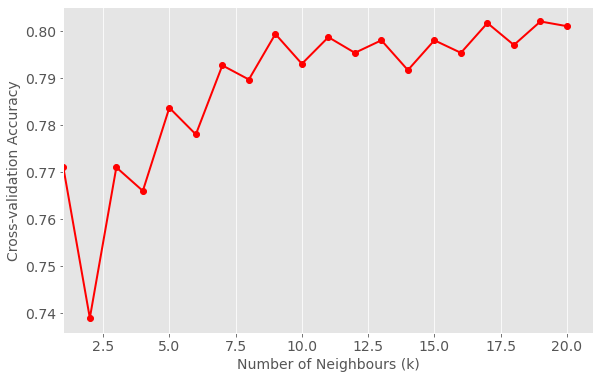

In [2519]:
# generating the plot

df_mean_accuracies = pd.Series(mean_accuracies)
ax = df_mean_accuracies.plot(figsize=(9.5,6), fontsize=14, lw=2, marker='o', color="red")
ax.set_ylabel("Cross-validation Accuracy", fontsize=14)
ax.set_xlabel("Number of Neighbours (k)", fontsize=14)
ax.yaxis.grid()
ax.set_xlim(1, 21);



In [2520]:
# sorting the values to see the parameter giving the highest accuracy
df_sorted = df_mean_accuracies.sort_values(ascending=False)
# print(df_sorted)
# geting the value of k which gives the highest accuracy
best_k = df_sorted.index[0]
print("Best value is k = %d having accuracy = %.3f percent" % (best_k,df_sorted.values[0]*100))

Best value is k = 19 having accuracy = 80.200 percent


From the above results we can see that the accuracy of the KNN classisfiers with the increase in neighbour values upto 10 but then it became stable from 10 to 20. The best value of k is found to be 19 in the above results but choosing higher value of k makes the algorithm become more tolerant to noise and outliers in the data. It may also lead to the loss of important details in the data and can result in poor performance so we can also choose k = 9 which has accuracy of 79.9% by looking at the above graph if needed.

We will move to the next classifier now.

### 2. DECISION TREES

The decision tree classifier is a tree-based model that splits the input data based on a set of decision rules which are based on the input features. The model uses these rules to predict the target variable. At each level of the tree, the algorithm selects the feature that provides the best split based on some criterion and the process repeats recursively until the data is completely classified or some stopping criteria are met.

In [2521]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# train the decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# evaluate the model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}")
print("F1(dissatisfied) = %.3f" % f1_score(y_test, y_pred, pos_label=False) )
print("F1(satisfied) = %.3f" % f1_score(y_test, y_pred, pos_label=True) )

Acc_DT = accuracy # for further analysis

Accuracy: 73.17
F1(dissatisfied) = 0.768
F1(satisfied) = 0.682


In [2522]:
# finding accuracy with cross validation

scores = cross_val_score(clf, data, target, cv=10)
print("Accuracy with 10-fold cross-validation: %0.2f percent" % (scores.mean()*100))

Acc_DT_cv = scores.mean() # for further analysis

Accuracy with 10-fold cross-validation: 74.43 percent


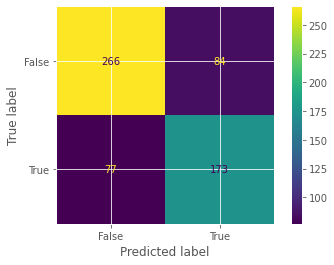

In [2523]:
# build the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# display it visually
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot();

cm_DT = cm # for further analysis

From the above confusion matrix we can conclude that the Decision Tree classifer was able to classify 76.86 % of the false values correctly and 70% of the true values correctly.

We will move to the next classifier now.

### 3. NAIVE BAYES

Naive Bayes is a probabilistic algorithm that makes predictions by relying on the Bayes theorem. The algorithm assumes that the presence or absence of a particular feature in a class is unrelated to the presence or absence of any other feature. It calculates the probability of a data point belonging to a particular class based on the values of its features. Then it selects the class with the highest probability as the predicted class.

In [2524]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}")
print("F1(dissatisfied) = %.3f" % f1_score(y_test, y_pred, pos_label=False) )
print("F1(satisfied) = %.3f" % f1_score(y_test, y_pred, pos_label=True) )

Acc_NB = accuracy # for further analysis

Accuracy: 79.17
F1(dissatisfied) = 0.823
F1(satisfied) = 0.747


In [2525]:
# finding accuracy with cross validation

scores = cross_val_score(nb_classifier, data, target, cv=10)
print("Accuracy with 10-fold cross-validation: %0.2f percent" % (scores.mean()*100))

Acc_NB_cv = scores.mean() # for further analysis

Accuracy with 10-fold cross-validation: 78.73 percent


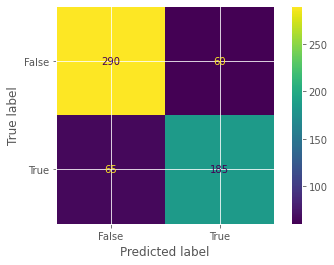

In [2526]:
# build the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# display it visually
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb_classifier.classes_)
disp.plot();

cm_NB = cm # for further analysis

From the above confusion matrix we can conclude that the Naive Bayes classifer was able to classify 82.86 % of the false values correctly and 74% of the true values correctly.

We will move to the next classifier now.

### 4. LOGISTIC REGRESSION

The logistic regression is a supervised machine learning algorithm used for classification problems whose main idea is to use a logistic function (sigmoid function) to model the probability of a certain event occurring based on input features.

In [2527]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)
LR = LogisticRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}")
print("F1(dissatisfied) = %.3f" % f1_score(y_test, y_pred, pos_label=False) )
print("F1(satisfied) = %.3f" % f1_score(y_test, y_pred, pos_label=True) )

Acc_LR = accuracy # for further analysis

Accuracy: 76.83
F1(dissatisfied) = 0.807
F1(satisfied) = 0.711


In [2528]:
# finding accuracy with cross validation

scores = cross_val_score(LR, data, target, cv=10)
print("Accuracy with 10-fold cross-validation: %0.2f percent" % (scores.mean()*100))

Acc_LR_cv = scores.mean() # for further analysis

Accuracy with 10-fold cross-validation: 78.47 percent


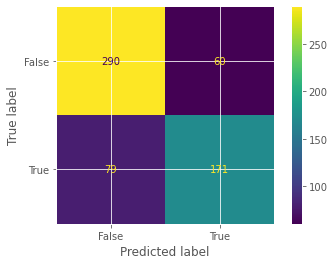

In [2529]:
# build the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# display it visually

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LR.classes_)
disp.plot();

cm_LR = cm # for further analysis

From the above confusion matrix we can conclude that the Logistic Regression classifer was able to classify 82.86 % of the false values correctly and 68.4% of the true values correctly.

We will move to the next classifier now.

### 5. SUPPORT VECTOR MACHINE (SVM)

The Support Vector Machine is a supervised machine learning algorithm whose main objective is to find the hyperplane that best separates the two classes in the feature space. A hyperplane is a linear decision boundary that divides the feature space into two regions, one for each class.
The algorithm then selects the hyperplane that has the maximum margin, which leads to better generalization and reduces the chances of overfitting.

In [2530]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)
svmC = SVC(kernel='linear', C=1, random_state=42)
svmC.fit(X_train, y_train)
y_pred = svmC.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}")
print("F1(dissatisfied) = %.3f" % f1_score(y_test, y_pred, pos_label=False) )
print("F1(satisfied) = %.3f" % f1_score(y_test, y_pred, pos_label=True) )

Acc_SVM = accuracy # for further analysis

Accuracy: 76.17
F1(dissatisfied) = 0.803
F1(satisfied) = 0.699


In [2531]:
# finding accuracy with cross validation

scores = cross_val_score(svmC, data, target, cv=10)
print("Accuracy with 10-fold cross-validation: %0.2f percent" % (scores.mean()*100))

Acc_SVM_cv = scores.mean() # for further analysis

Accuracy with 10-fold cross-validation: 78.50 percent


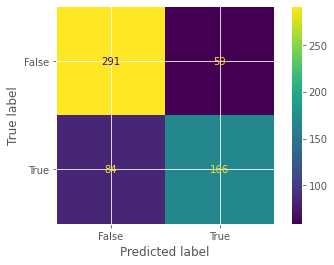

In [2532]:
# build the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# display it visually

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svmC.classes_)
disp.plot();

cm_SVM = cm # for further analysis

From the above confusion matrix we can conclude that the Support Vector Machine classifer was able to classify 83.14 % of the false values correctly and 66.4% of the true values correctly.

The accuracy of all the 5 classifiers is found and we have 5 models to predict the class of the new random data.

We can analyze the performances of all the classifiers by graphical analysis and confusion matrix.

First the comperative analysis of all the classifier is done based on their accuracy with and without cross validation (of 10 folds).

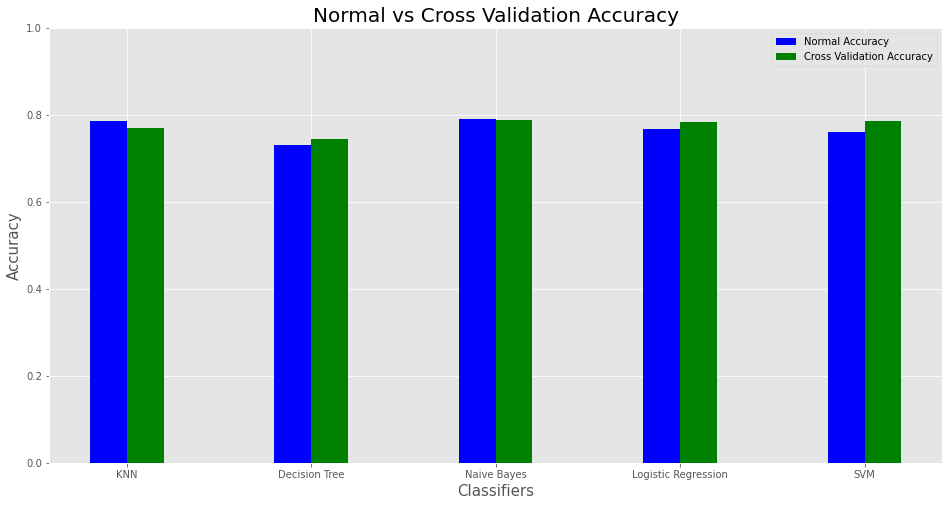

In [2533]:
x = np.array([1,2,3,4,5])
x_classifier = ["KNN", "Decision Tree", "Naive Bayes", "Logistic Regression", "SVM"]
y_classifer = [Acc_KNN, Acc_DT,  Acc_NB, Acc_LR, Acc_SVM]
y_classifer_cv = [Acc_KNN_cv, Acc_DT_cv,  Acc_NB_cv, Acc_LR_cv, Acc_SVM_cv]

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(x-0.1, y_classifer, width=0.2, label='Normal Accuracy', color='blue')
ax.bar(x+0.1, y_classifer_cv, width=0.2, label='Cross Validation Accuracy', color='green')


ax.set_xticks(x)
ax.set_xticklabels(x_classifier)
ax.set_xlabel('Classifiers',fontsize=15.0)
ax.set_ylabel('Accuracy',fontsize=15.0)
ax.set_ylim(0,1.0)
ax.set_title('Normal vs Cross Validation Accuracy',fontsize=20.0)
ax.legend();

From the above graph it can be analyzed that Naive bayes classifier has highest accuracy of all the classifiers. It also can be seen from the graph that the accuracy of some classifiers increased after cross validation and decreased for other classifiers. This can be due to the lack of enough examples. The Dataset used for training the model may not be large enough to capture the variability in the data.

Further analysis can be done by checking the number of true and false values classified correctly by the classifier.

In [2534]:
cm_classifier_True = []
cm_classifier_False = []

cm_classifier_False.append((cm_Knn[0][0])/(cm_Knn[0][0]+cm_Knn[0][1]))
cm_classifier_False.append((cm_DT[0][0])/(cm_DT[0][0]+cm_DT[0][1]))
cm_classifier_False.append((cm_NB[0][0])/(cm_NB[0][0]+cm_NB[0][1]))
cm_classifier_False.append((cm_LR[0][0])/(cm_LR[0][0]+cm_LR[0][1]))
cm_classifier_False.append((cm_SVM[0][0])/(cm_SVM[0][0]+cm_SVM[0][1]))

cm_classifier_True.append((cm_Knn[1][1])/(cm_Knn[1][0]+cm_Knn[1][1]))
cm_classifier_True.append((cm_DT[1][1])/(cm_DT[1][0]+cm_DT[1][1]))
cm_classifier_True.append((cm_NB[1][1])/(cm_NB[1][0]+cm_NB[1][1]))
cm_classifier_True.append((cm_LR[1][1])/(cm_LR[1][0]+cm_LR[1][1]))
cm_classifier_True.append((cm_SVM[1][1])/(cm_SVM[1][0]+cm_SVM[1][1]))

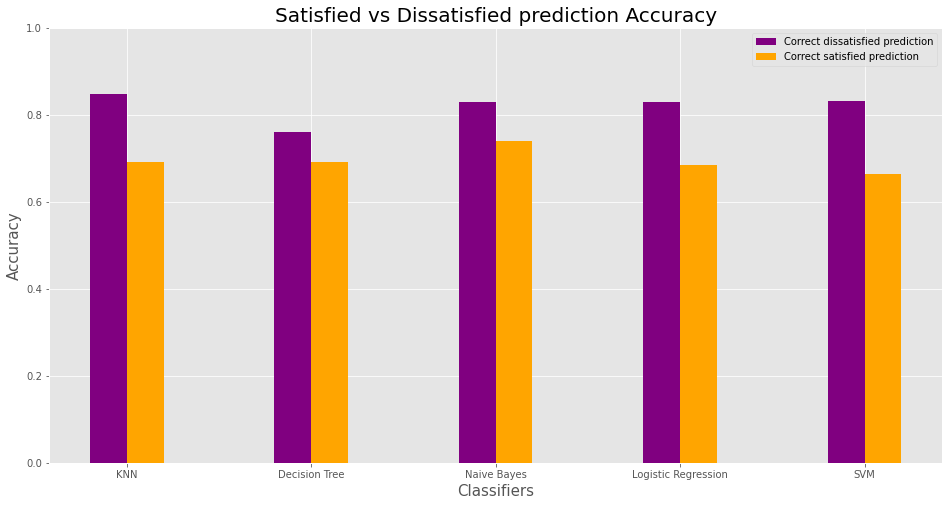

In [2535]:
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(x-0.1, cm_classifier_False, width=0.2, label='Correct dissatisfied prediction', color='purple')
ax.bar(x+0.1, cm_classifier_True, width=0.2, label='Correct satisfied prediction', color='orange')


ax.set_xticks(x)
ax.set_xticklabels(x_classifier)
ax.set_xlabel('Classifiers',fontsize=15.0)
ax.set_ylabel('Accuracy',fontsize=15.0)
ax.set_ylim(0,1.0)
ax.set_title('Satisfied vs Dissatisfied prediction Accuracy',fontsize=20.0)
ax.legend();

From the above results we can conclude that the Naive Bayes classifier was the best in terms of predicting the satisfied (True) values correctly and Support Vector Machine classifier was the best in terms of predicting the dissatisfied (False) values correctly.

Now predicting the class of the new random data by all 5 models.

In [2536]:
random_input = np.array([[2.0, 3.0, 5.0, 1.0, 5.0, 4.0, 2.0, 3.0, 1.0]]);

print("The KNN classifiers predicts the new random data as dissatisfied" if m.predict(random_input)[0]==False
      else"The KNN classifiers predicts the new random data as satisfied")

print("The Decision Tree classifiers predicts the new random data as dissatisfied" if clf.predict(random_input)[0]==False 
      else"The Decision Tree classifiers predicts the new random data as satisfied")

print("The Naive Bayes classifiers predicts the new random data as dissatisfied" if nb_classifier.predict(random_input)[0]==False 
      else"The Naive Bayes classifiers predicts the new random data as satisfied")

print("The Logistic Regression classifiers predicts the new random data as dissatisfied" if LR.predict(random_input)[0]==False 
      else"The Logistic Regression classifiers predicts the new random data as satisfied")

print("The Support Vector Machine classifiers predicts the new random data as dissatisfied" if svmC.predict(random_input)[0]==False 
      else"The Support Vector Machine classifiers predicts the new random data as satisfied")


The KNN classifiers predicts the new random data as dissatisfied
The Decision Tree classifiers predicts the new random data as dissatisfied
The Naive Bayes classifiers predicts the new random data as dissatisfied
The Logistic Regression classifiers predicts the new random data as satisfied
The Support Vector Machine classifiers predicts the new random data as satisfied


E:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
E:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In the above results we can see that the outputs of the classifiers are different in terms of predicting the target variable value. This is because 80 percent of the data is used for training the model which is picked randomly by every classifier. The results can be same by all classifiers if we train the model on whole data set and than predict the target variable for the new data.

# ________________________________________________________________________________

## TASK 04: TEXT DATA CLASSIFICATION

### PREPROCESSING

Most of the preprocessing part is done in task 1. Just ntegrating text comments data with the tabular data now.

In [2537]:
df_tab_com  = df_tabular.copy() # copying tabular data into a new data frame for this task
df_tab_com['comments'] = df_comments['comments']


In [2538]:
df_tab_com['satisfied'].value_counts()

False    1737
True     1263
Name: satisfied, dtype: int64

In [2539]:
df_tab_com.head()

,date,customer_gender,customer_age,customer_location,customer_type,has_cc,has_mortgage,convenience,customer_service,online_banking,interest_rates,fees_charges,community_involvement,products_services,privacy_security,reputation,satisfied,comments
0,2022-08-22,Male,50.0,Munster,Personal,True,False,4.0,5.0,4.0,4.0,4.0,4.0,5.0,2.0,4.0,True,Overal
1,2022-11-23,Female,61.0,Leinster,Personal,True,False,5.0,5.0,5.0,3.0,5.0,4.0,4.0,5.0,5.0,True,Easy to find zhe bank ' s branches and ATMs. A...
2,2022-01-21,Female,63.0,Munster,Business,True,False,2.0,2.0,5.0,5.0,2.0,3.0,4.0,4.0,3.0,True,Bank's phone app is really great. In general a...
3,2022-03-13,Female,47.0,Leinster,Business,True,False,3.0,4.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,True,Uncommented
4,2022-08-08,Female,41.0,Leinster,Personal,True,True,1.0,1.0,1.0,1.0,2.0,2.0,4.0,5.0,2.0,False,Uncommented


From above result we can see that he comments column is added in the data frame. The customer responses and comments were in same order as checked by the customer ID in both the data sets so no sorted needed.

Using the DataFrame and functionality from scikit-learn, we will create a vector representations of the customer comments. We are using the standard scikit-learn tokenizer and a simple CountVectorizer.

In [2540]:
comments = df_tab_com["comments"]
target = df_tab_com['satisfied']

# applying the vectorization process
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df = 10, stop_words=None)
data = vectorizer.fit_transform(comments)

# check the size of the resulting representation
print(data.shape)

(3000, 333)


In [2541]:
# checking the number of terms/words in our preprocessed vocabulary
terms = vectorizer.get_feature_names_out()
print("Vocabulary has %d distinct terms" % len(terms))

Vocabulary has 333 distinct terms


### CLASSIFICATION


In [2542]:
data_train, data_test, target_train, target_test = train_test_split(data, target, test_size=0.2, random_state=42)
# we will just check how many comments in each set
print("Training set has %d comments" % data_train.shape[0] )
print("Test set has %d comments" % data_test.shape[0] )

Training set has 2400 comments
Test set has 600 comments


The target and data is now seperated and now different supervised learning classification algorithms can be used to classify the customer responses based on the feature ratings.

There are 4 classifiers used here one by one and their accuracy, cross validation accuracy and confusion matrix are found. These 4 classifiers are:

1. KNN (K-Nearest Neighbor)
2. Decision Trees
3. Logistic Regression
4. Support Vector Machine (SVM)


### 1. KNN

Training a kNN classification model with 3 neighbours, and evaluating the accuracy of this model using a single train/test split, so that we have 80% of the comments in the training set and 20% in the test set.

In [2543]:
# prepare the k-NN classification model, for 3 nearest neighbours in this case

model = KNeighborsClassifier(n_neighbors=3)
model.fit(data_train, target_train)
predicted = model.predict(data_test)
acc = accuracy_score(target_test, predicted)

print("Accuracy = %.4f" % acc)

t4_Acc_KNN = acc # for further analysis

Accuracy = 0.8850


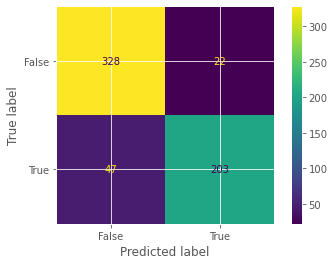

In [2544]:
# build the confusion matrix
cm = confusion_matrix(target_test, predicted)
# display it visually
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot();

t4_cm_Knn = cm # for further analysis

In [2545]:
# apply 10-fold cross-validation, measuring accuracy each time
acc_scores = cross_val_score(model, X, target, cv=10, scoring="accuracy")
print("KNN (k=1): Mean cross-validation accuracy = %.3f" % acc_scores[1])

t4_Acc_KNN_cv = acc_scores[1]

KNN (k=1): Mean cross-validation accuracy = 0.867


In [2546]:
# changing values of k from 1 to 20 and getting accuracy values

for k in range(2,21):
    # applying KNN for the specified value
    knn = KNeighborsClassifier(n_neighbors=k)
    fold_scores = cross_val_score(knn, data, target, cv=10, scoring="accuracy")
    mean_accuracies[k] = fold_scores.mean()

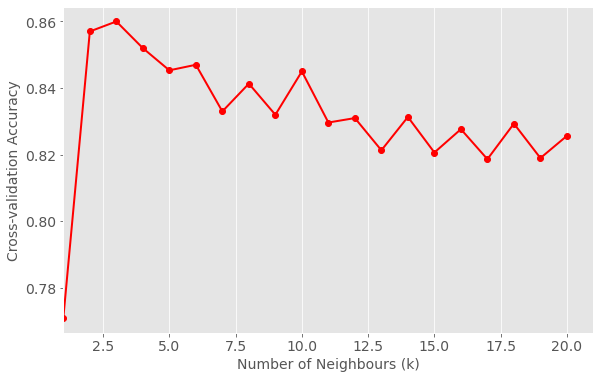

In [2547]:
# generating the plot

df_mean_accuracies = pd.Series(mean_accuracies)
ax = df_mean_accuracies.plot(figsize=(9.5,6), fontsize=14, lw=2, marker='o', color="red")
ax.set_ylabel("Cross-validation Accuracy", fontsize=14)
ax.set_xlabel("Number of Neighbours (k)", fontsize=14)
ax.yaxis.grid()
ax.set_xlim(1, 21);

From the above graph we can see that K=3 is the value with highest accuracy.

### 2. DECISION TREES

In [2548]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# train the decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# evaluate the model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}")
print("F1(dissatisfied) = %.3f" % f1_score(y_test, y_pred, pos_label=False) )
print("F1(satisfied) = %.3f" % f1_score(y_test, y_pred, pos_label=True) )

t4_Acc_DT = accuracy # for further analysis

Accuracy: 88.00
F1(dissatisfied) = 0.902
F1(satisfied) = 0.844


In [2549]:
# finding accuracy with cross validation

scores = cross_val_score(clf, data, target, cv=10)
print("Accuracy with 10-fold cross-validation: %0.2f percent" % (scores.mean()*100))

t4_Acc_DT_cv = scores.mean() # for further analysis

Accuracy with 10-fold cross-validation: 85.47 percent


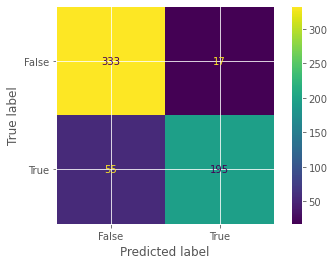

In [2550]:
# build the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# display it visually
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot();

t4_cm_DT = cm # for further analysis

### 3. LOGISTIC REGRESSION

In [2551]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)
LR = LogisticRegression()
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}")
print("F1(dissatisfied) = %.3f" % f1_score(y_test, y_pred, pos_label=False) )
print("F1(satisfied) = %.3f" % f1_score(y_test, y_pred, pos_label=True) )

t4_Acc_LR = accuracy # for further analysis

Accuracy: 91.00
F1(dissatisfied) = 0.928
F1(satisfied) = 0.881


In [2552]:
# finding accuracy with cross validation

scores = cross_val_score(LR, data, target, cv=10)
print("Accuracy with 10-fold cross-validation: %0.2f percent" % (scores.mean()*100))

t4_Acc_LR_cv = scores.mean() # for further analysis

Accuracy with 10-fold cross-validation: 87.97 percent


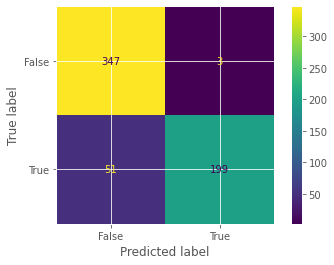

In [2553]:
# build the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# display it visually

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LR.classes_)
disp.plot();

t4_cm_LR = cm # for further analysis

### 4. SUPPORT VECTOR MACHINE

In [2554]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)
svmC = SVC(kernel='linear', C=1, random_state=42)
svmC.fit(X_train, y_train)
y_pred = svmC.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100:.2f}")
print("F1(dissatisfied) = %.3f" % f1_score(y_test, y_pred, pos_label=False) )
print("F1(satisfied) = %.3f" % f1_score(y_test, y_pred, pos_label=True) )

t4_Acc_SVM = accuracy # for further analysis

Accuracy: 91.00
F1(dissatisfied) = 0.927
F1(satisfied) = 0.882


In [2555]:
# finding accuracy with cross validation

scores = cross_val_score(svmC, data, target, cv=10)
print("Accuracy with 10-fold cross-validation: %0.2f percent" % (scores.mean()*100))

t4_Acc_SVM_cv = scores.mean() # for further analysis

Accuracy with 10-fold cross-validation: 87.53 percent


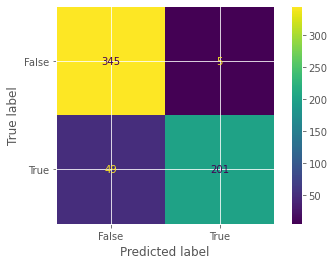

In [2556]:
# build the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# display it visually

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svmC.classes_)
disp.plot();

t4_cm_SVM = cm # for further analysis

We can analyze the performances of all the classifiers by graphical analysis and confusion matrix.

First the comperative analysis of all the classifier is done based on their accuracy with and without cross validation (of 10 folds).

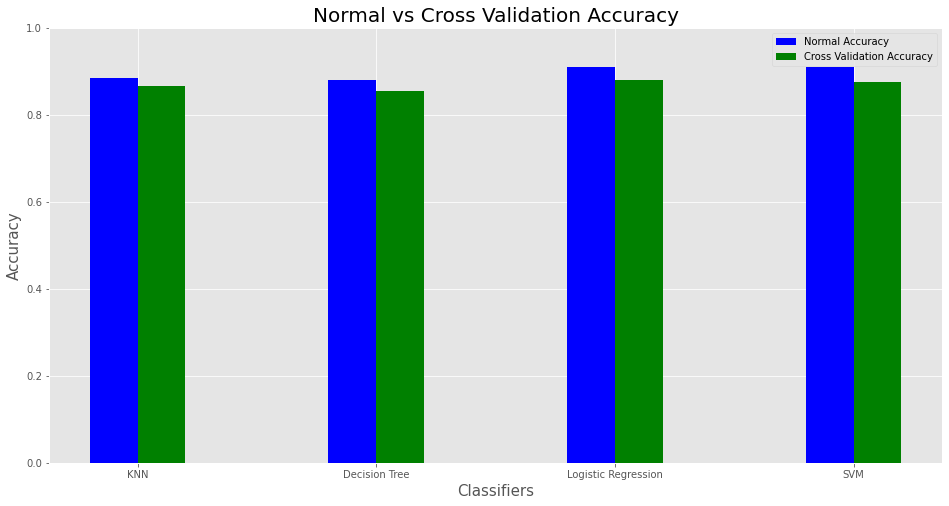

In [2557]:
x = np.array([1,2,3,4])
x_classifier = ["KNN", "Decision Tree", "Logistic Regression", "SVM"]
y_classifer = [t4_Acc_KNN, t4_Acc_DT, t4_Acc_LR, t4_Acc_SVM]
y_classifer_cv = [t4_Acc_KNN_cv, t4_Acc_DT_cv, t4_Acc_LR_cv, t4_Acc_SVM_cv]

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(x-0.1, y_classifer, width=0.2, label='Normal Accuracy', color='blue')
ax.bar(x+0.1, y_classifer_cv, width=0.2, label='Cross Validation Accuracy', color='green')


ax.set_xticks(x)
ax.set_xticklabels(x_classifier)
ax.set_xlabel('Classifiers',fontsize=15.0)
ax.set_ylabel('Accuracy',fontsize=15.0)
ax.set_ylim(0,1.0)
ax.set_title('Normal vs Cross Validation Accuracy',fontsize=20.0)
ax.legend();

From the above graph it can be analyzed that the Logistic Regression and Support Vector Machine classifiers have highest accuracy of all the classifiers. It also can be seen from the graph that the accuracy of all classifiers decreased after cross validation. This can be due to the lack of enough examples. The Dataset used for training the model may not be large enough to capture the variability in the data.

Further analysis can be done by checking the number of true and false values classified correctly by the classifier.

In [2558]:
cm_classifier_True = []
cm_classifier_False = []

cm_classifier_False.append((t4_cm_Knn[0][0])/(t4_cm_Knn[0][0]+t4_cm_Knn[0][1]))
cm_classifier_False.append((t4_cm_DT[0][0])/(t4_cm_DT[0][0]+t4_cm_DT[0][1]))
cm_classifier_False.append((t4_cm_LR[0][0])/(t4_cm_LR[0][0]+t4_cm_LR[0][1]))
cm_classifier_False.append((t4_cm_SVM[0][0])/(t4_cm_SVM[0][0]+t4_cm_SVM[0][1]))

cm_classifier_True.append((t4_cm_Knn[1][1])/(t4_cm_Knn[1][0]+t4_cm_Knn[1][1]))
cm_classifier_True.append((t4_cm_DT[1][1])/(t4_cm_DT[1][0]+t4_cm_DT[1][1]))
cm_classifier_True.append((t4_cm_LR[1][1])/(t4_cm_LR[1][0]+t4_cm_LR[1][1]))
cm_classifier_True.append((t4_cm_SVM[1][1])/(t4_cm_SVM[1][0]+t4_cm_SVM[1][1]))

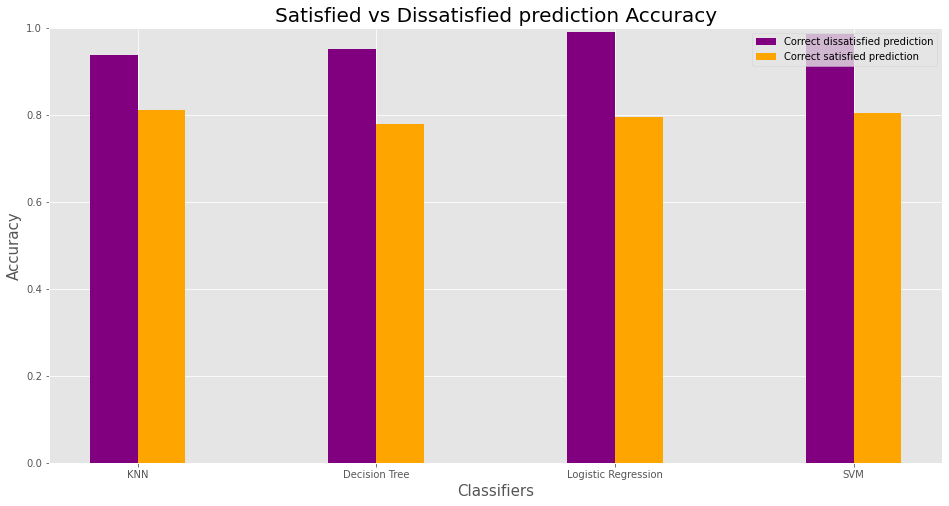

In [2559]:
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(x-0.1, cm_classifier_False, width=0.2, label='Correct dissatisfied prediction', color='purple')
ax.bar(x+0.1, cm_classifier_True, width=0.2, label='Correct satisfied prediction', color='orange')


ax.set_xticks(x)
ax.set_xticklabels(x_classifier)
ax.set_xlabel('Classifiers',fontsize=15.0)
ax.set_ylabel('Accuracy',fontsize=15.0)
ax.set_ylim(0,1.0)
ax.set_title('Satisfied vs Dissatisfied prediction Accuracy',fontsize=20.0)
ax.legend();

From the above results we can conclude that the logistic regression and suppport vector machine classifiers were the best in terms of predicting the dissatisfied (False) values correctly and KNN classifier was the best in terms of predicting the satisfied (True) values correctly.


## TASK 05: CONCLUSION

The preprocessing of the two data sets i.e., tabular and textual was done in the first task by cleaning and filling the values in them. The analysis of the tabular data was done in terms of graphs in task 2. In task 3, the classification of the tabular data was done on 5 different classifiers according to the rating values of the 9 features in the dataset and the performances of all the classifiers were compared. The textual data was then used in task 4 to classify and customer responses using 4 different classifiers and their performances were compared.

### COMPARING TWO DATASETS:

The two datasets given were tabular dataset and text data set. They both performed well in terms of classification but the test data was found more accurate in terms of classification of the customer responses because the highest accuracy in tabular data calssification by any classifier was just above 80 % but the accuracy in text data went above 90 percent for SVM and logistic regression classifer.

### CHALLENGES FACED:

- The first challenge I faced in getting the data frame from the csv file but the csv file was not well organized and the data was seperated by tabs instead of being in each column so I split the data by tabs and then placed it in the column and generated another csv file which was used further to get the data in a data frame.


- The main challenge I faced was in the classification of the datasets. The accuracy of the classifier was changing whenever I executed the cell having the train_test_split command. To solve this issue I used an attribute in the train_test_split command called 'random state' and set its value to a constant number which kept the accuracy value constant. This is because the train_test_split takes data randomly in training and testing but setting the constant random_state value will allow the function to choose the train and test data in the same way each time the code is run.


- Another challenge I faced was in temporal analysis of the data. The direct output from data set representing date and the number of satisfied and unsatisfied responses was not easily understandable from the graph so first I sorted the data by date and then splitted the dataset in to 12 smaller datasets (representing 2 months in 1 dataset roughly) and then took the average value of number of satisfied response for those smaller datasets and then worked on them for further analysis.

### SUGGESTIONS FOR FURTHER ANALYSIS/CLASSIFICATION:

- The temporal analysis can be done in a better way by splitting the large data set of two years into smaller datasets representing monthly data and then the month wise analysis can be done to acquire the changes of response of the bank customers with time.

- The tokenizer used in the task 4 here for text data is standard scikit-learn tokenizer but gave very good results but for better results we can use custom tokenizers as well to handle the specific comments or comments of any other language than english.

- More pre-processing steps can be taken in the text data like stemming, lemetization etc.